<a href="https://colab.research.google.com/github/Bio-MingChen/DL_practice_by_Colab/blob/main/pytroch_test_20250805.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ÂØπ‰∫éÂç∑ÁßØÂ±Ç `Conv2D`ÔºåËæìÂá∫ÂõæÂÉèÁöÑÂ§ßÂ∞èÂèØ‰ª•ÈÄöËøá‰∏ãÈù¢Ëøô‰∏™ÂÖ¨ÂºèËÆ°ÁÆóÔºö

---

### ‚úÖ ËæìÂá∫Â∞∫ÂØ∏ËÆ°ÁÆóÂÖ¨ÂºèÔºà‰∏çËÄÉËôë dilationÔºâÔºö

ËÆæËæìÂÖ•ÂõæÂÉèÂ§ßÂ∞è‰∏∫Ôºö

* È´òÂ∫¶ \$H\_{in}\$
* ÂÆΩÂ∫¶ \$W\_{in}\$

Âç∑ÁßØÊ†∏ÂèÇÊï∞‰∏∫Ôºö

* Ê†∏Â§ßÂ∞èÔºö\$K\$Ôºà‰æãÂ¶Ç \$K = 3\$ Ë°®Á§∫ \$3 \times 3\$Ôºâ
* Ê≠•ÈïøÔºö\$S\$
* Â°´ÂÖÖÔºö\$P\$

ÂàôËæìÂá∫ÂõæÂÉèÁöÑÂ∞∫ÂØ∏‰∏∫Ôºö

$$
H_{out} = \left\lfloor \frac{H_{in} + 2P - K}{S} \right\rfloor + 1
$$

$$
W_{out} = \left\lfloor \frac{W_{in} + 2P - K}{S} \right\rfloor + 1
$$

---

### üìå ‰∏æ‰∏™‰æãÂ≠êÔºö

#### ËæìÂÖ•Ôºö

* ËæìÂÖ•ÂõæÂÉèÂ§ßÂ∞èÔºö\$5 \times 5\$
* Âç∑ÁßØÊ†∏Ôºö\$3 \times 3\$
* Ê≠•Èïø \$S = 1\$
* Â°´ÂÖÖ \$P = 0\$

ÂàôËæìÂá∫‰∏∫Ôºö

$$
H_{out} = \left\lfloor \frac{5 + 0 - 3}{1} \right\rfloor + 1 = 3
$$

$$
W_{out} = 3
$$

ËæìÂá∫ÂõæÂÉèÂ§ßÂ∞èÔºö\$3 \times 3\$

---

### üß† Â∏∏ËßÅËÆæÁΩÆÔºö

| Ê®°Âºè        | Padding                                            | ËæìÂá∫Â§ßÂ∞èÂèòÂåñ              |
| --------- | -------------------------------------------------- | ------------------- |
| `'valid'` | \$P = 0\$                                          | ËæìÂá∫Â∞è‰∫éËæìÂÖ•              |
| `'same'`  | \$P = \left\lfloor \frac{K - 1}{2} \right\rfloor\$ | ËæìÂá∫Â∞∫ÂØ∏Á≠â‰∫éËæìÂÖ•ÔºàÂΩì \$S=1\$Ôºâ |

---

### üõ† ÂÆûÊàò TipsÔºö

1. **Ë¶Å‰øùÊåÅËæìÂÖ•ËæìÂá∫Â§ßÂ∞è‰∏ÄËá¥**ÔºåÈÄöÂ∏∏ËÆæÁΩÆÔºö

   * `padding = 'same'`
   * `stride = 1`

2. **ÂáèÂ∞èÁâπÂæÅÂõæÂ∞∫ÂØ∏**ÔºåÂèØ‰ª•Áî®Ôºö

   * ËæÉÂ§ßÁöÑÂç∑ÁßØÊ†∏
   * Êõ¥Â§ßÁöÑ strideÔºàÂ¶Ç \$S=2\$Ôºâ
   * ‰∏çÂä† padding

3. **PyTorch Âíå TensorFlow ÈÉΩÊèê‰æõËá™Âä®ËÆ°ÁÆó padding ÁöÑÊñπÂºèÔºàÂ¶Ç `padding='same'`Ôºâ**

---

Â¶Ç‰Ω†Â∏åÊúõÊàëÂÜô‰∏ÄÊÆµ PyTorch Êàñ TensorFlow ÁöÑ‰ª£Á†ÅÊù•È™åËØÅËøô‰∏™ËÆ°ÁÆóÔºåÊàë‰πüÂèØ‰ª•Êèê‰æõ„ÄÇÊòØÂê¶ÈúÄË¶ÅÔºü


In [4]:
import torch
from torch import nn
from torch.nn import functional as F
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST
from torchvision import transforms
import matplotlib.pyplot as plt

In [3]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cuda device


In [8]:
BATCH_SIZE=64
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,),(0.3081,))
])
training_data = MNIST(root="data",train=True,download=True,transform=transform)
test_data = MNIST(root="data",train=False,download=True,transform=transform)
train_dataloader = DataLoader(training_data,batch_size=BATCH_SIZE,shuffle=True)
test_dataloader = DataLoader(test_data,batch_size=BATCH_SIZE,shuffle=True)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 9.91M/9.91M [00:00<00:00, 18.1MB/s]
100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 28.9k/28.9k [00:00<00:00, 484kB/s]
100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1.65M/1.65M [00:00<00:00, 4.56MB/s]
100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 4.54k/4.54k [00:00<00:00, 8.96MB/s]


ÈùûÂ∏∏Â•ΩÁöÑÈóÆÈ¢òÔºÅ‰Ω†ÁªôÂá∫ÁöÑËøôÊÆµ‰ª£Á†ÅÊòØÁî®‰∫é **ÂõæÂÉèÈ¢ÑÂ§ÑÁêÜ** ÁöÑÔºåÂ∏∏Áî®‰∫é PyTorch ‰∏≠ÂØπÊï∞ÊçÆÈõÜÔºàÊØîÂ¶Ç MNISTÔºâÁöÑÊ†áÂáÜÂåñÂ§ÑÁêÜ„ÄÇÊàë‰ª¨ÈÄêÊ≠•ËÆ≤Ëß£Ôºö

---

## üîπ ‰ª£Á†ÅÊãÜËß£ËÆ≤Ëß£

```python
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])
```

### ‚úÖ 1. `transforms.ToTensor()`

* ‰ΩúÁî®ÔºöÂ∞Ü **PIL ÂõæÂÉè Êàñ NumPy Êï∞ÁªÑ** ËΩ¨Êç¢‰∏∫ PyTorch ÁöÑ `torch.FloatTensor`ÔºåÂπ∂‰∏î‰ºöÂ∞ÜÂÉèÁ¥†ÂÄº‰ªé `[0, 255]` Áº©ÊîæÂà∞ `[0.0, 1.0]`„ÄÇ

---

### ‚úÖ 2. `transforms.Normalize((0.1307,), (0.3081,))`

* **Normalize ÊòØÊ†áÂáÜÂåñÊìç‰Ωú**Ôºå‰ΩúÁî®ÊòØÂØπÊØè‰∏™ÈÄöÈÅìËøõË°åÂ¶Ç‰∏ãÂèòÊç¢Ôºö

$$
x_{norm} = \frac{x - \mu}{\sigma}
$$

* `(0.1307,)` ÊòØ MNIST Êï∞ÊçÆÈõÜ‰∏≠ÂÉèÁ¥†ÂÄºÁöÑÂùáÂÄºÔºàmeanÔºâ
* `(0.3081,)` ÊòØÊ†áÂáÜÂ∑ÆÔºàstdÔºâ

Âõ†Ê≠§ÔºåÂÆÉÂ∞ÜÊØè‰∏™ÂÉèÁ¥†‰ªé `[0, 1]` ÂèòÊç¢Âà∞‰∏Ä‰∏™ **Ê†áÂáÜÊ≠£ÊÄÅÂàÜÂ∏É** ËåÉÂõ¥ÔºåÂ§ßÁ∫¶Âú® `[-1, 1]` ‰πãÈó¥ÔºåÊïàÊûúÊõ¥Â•ΩÂú∞Â∏ÆÂä©Ê®°ÂûãÊî∂Êïõ„ÄÇ

---

## üß† ‰∏∫‰ªÄ‰πàË¶Å NormalizeÔºü

* Áªü‰∏ÄËæìÂÖ•ÂàÜÂ∏ÉÔºöÈò≤Ê≠¢Êüê‰∫õÁâπÂæÅÂÄºËøáÂ§ßÊàñËøáÂ∞èÔºåÈÄ†ÊàêËÆ≠ÁªÉ‰∏çÁ®≥ÂÆöÔºõ
* Â∏ÆÂä©Ê¢ØÂ∫¶‰∏ãÈôçÊî∂ÊïõÊõ¥Âø´Ôºõ
* ÊèêÂçáÊ®°ÂûãÊÄßËÉΩ„ÄÇ

---

## üî∏ Â¶ÇÊûú‰∏çÊòØÂõæÂÉèÔºåËÄåÊòØ‰∏ÄÁª¥Êï∞ÊçÆÔºåÂ¶Ç‰Ωï NormalizeÔºü

‰∏æ‰∏™‰æãÂ≠êÔºö‰Ω†Êúâ‰∏Ä‰∏™‰∏ÄÁª¥Âº†ÈáèÔºå‰æãÂ¶Ç‰∏Ä‰∏™ÂåÖÂê´Ëã•Âπ≤Êï∞ÂÄºÁöÑ `1D array`Ôºå‰Ω†ÂèØ‰ª•Áõ¥Êé•‰ΩøÁî®Ôºö

```python
# ‰∏æ‰æãÔºöx ÊòØ torch.TensorÔºå‰æãÂ¶Ç [2.0, 3.0, 5.0, 6.0]
mean = x.mean()
std = x.std()
x_normalized = (x - mean) / std
```

‰πüÂèØ‰ª•Â∞ÅË£ÖÊàêËá™ÂÆö‰πâÁöÑ `transform` ÂáΩÊï∞Ôºö

```python
class Normalize1D(object):
    def __init__(self, mean, std):
        self.mean = mean
        self.std = std
        
    def __call__(self, x):
        return (x - self.mean) / self.std
```

ÁÑ∂ÂêéÂÉèËøôÊ†∑ÁªÑÂêàÔºö

```python
transform = transforms.Compose([
    YourToTensorFunction(),  # Â¶ÇÊûúÊòØCSVÊï∞ÊçÆÔºåÈúÄË¶ÅËá™ÂÆö‰πâËΩ¨Êç¢ÊàêTensor
    Normalize1D(mean, std)
])
```

---

## ‚úÖ ÊÄªÁªìÔºöÊòØÂê¶‰ΩøÁî® NormalizeÔºü

| ÊÉÖÂÜµ     | ÊòØÂê¶ÈúÄË¶Å Normalize | Êé®ËçêÊñπÊ≥ï                        |
| ------ | -------------- | --------------------------- |
| ÂõæÂÉè     | ÊòØ              | ‰ΩøÁî® `transforms.Normalize()` |
| ‰∏ÄÁª¥Êï∞ÂÄºÊï∞ÊçÆ | ÊòØ              | Ëá™Ë°åËÆ°ÁÆó `mean` / `std` ÂêéÊ†áÂáÜÂåñ    |
| Â∑≤Ê†áÂáÜÂåñÊï∞ÊçÆ | Âê¶              | Êó†ÈúÄÂÜçÊ¨° Normalize              |

---

Â¶Ç‰Ω†Êèê‰æõ‰∏ÄÁª¥Êï∞ÊçÆÁöÑÁ§∫‰æãÊ†ºÂºèÔºåÊàëÂèØ‰ª•Â∏Æ‰Ω†ÂÜôÂá∫ÂÆåÊï¥ÁöÑÊ†áÂáÜÂåñ pipeline„ÄÇÊòØÂê¶Ë¶ÅÔºü

ËøôÊòØ‰∏™ÂæàÂ•ΩÁöÑÈóÆÈ¢òÔºÅÂÉè `(0.1307,), (0.3081,)` ËøôÊ†∑Áî® **ÂÖÉÁªÑÔºàtupleÔºâÂåÖËµ∑Êù•**ÔºåÊòØ‰∏∫‰∫ÜÂ§ÑÁêÜ **Â§öÈÄöÈÅìÊï∞ÊçÆÔºàÂ¶ÇÂõæÂÉèÔºâÊó∂ÊØè‰∏™ÈÄöÈÅìÈÉΩÊúâ‰∏çÂêåÁöÑÂùáÂÄºÂíåÊ†áÂáÜÂ∑Æ**„ÄÇÊàë‰ª¨ÂÖ∑‰ΩìÊù•Ëß£Èáä‰∏∫‰ªÄ‰πàËøôÊ†∑ÂÜôÔºåÂç≥‰ΩøÂØπ MNIST ËøôÊ†∑ÁöÑÂçïÈÄöÈÅìÊï∞ÊçÆ‰πüË¶ÅËøô‰πàÂÜô„ÄÇ

---

## ‚úÖ ÂéüÂõ†Ôºö`transforms.Normalize(mean, std)` ÁöÑÂèÇÊï∞Ê†ºÂºèË¶ÅÊ±Ç

* `mean`: ÊØè‰∏™ÈÄöÈÅìÁöÑÂùáÂÄºÁªÑÊàêÁöÑ**ÂÖÉÁªÑ**
* `std`: ÊØè‰∏™ÈÄöÈÅìÁöÑÊ†áÂáÜÂ∑ÆÁªÑÊàêÁöÑ**ÂÖÉÁªÑ**

### üéØ ‰∏æ‰∏™‰æãÂ≠êÔºö

#### 1. **MNIST ÊòØÁÅ∞Â∫¶ÂõæÂÉè**Ôºà1 ‰∏™ÈÄöÈÅìÔºâÔºö

```python
transforms.Normalize((0.1307,), (0.3081,))
```

ËøôÈáå `(0.1307,)` Ë°®Á§∫Á¨¨‰∏Ä‰∏™ÈÄöÈÅìÔºàÂîØ‰∏Ä‰∏Ä‰∏™ÈÄöÈÅìÔºâÁöÑÂùáÂÄºÊòØ `0.1307`„ÄÇ

---

#### 2. **CIFAR-10 ÊòØ RGB ÂΩ©Ëâ≤ÂõæÂÉè**Ôºà3 ‰∏™ÈÄöÈÅìÔºâÔºö

```python
transforms.Normalize((0.4914, 0.4822, 0.4465),
                     (0.2023, 0.1994, 0.2010))
```

ÊØè‰∏™ÈÄöÈÅìÔºàR„ÄÅG„ÄÅBÔºâÈÉΩÊúâËá™Â∑±ÁöÑÂùáÂÄºÂíåÊ†áÂáÜÂ∑Æ„ÄÇ

---

## ‚ùó Â¶ÇÊûú‰∏çÂåÖÊàê tupleÔºå‰ºöÊÄéÊ†∑Ôºü

```python
transforms.Normalize(0.1307, 0.3081)
```

‰ºöÊä•ÈîôÔºåÊàñËÄÖË¢´ÈîôËØØÁêÜËß£Êàê **Â§ö‰∏™ÈÄöÈÅìÂÖ±‰∫´ÁöÑÊ†áÈáè**Ôºå‰ΩÜ PyTorch ÁöÑ `transforms.Normalize` ÊòéÁ°ÆË¶ÅÊ±Ç‰º†ÂÖ• **tuple Êàñ list**ÔºåÂç≥‰ΩøÂè™Êúâ‰∏Ä‰∏™ÈÄöÈÅì‰πüË¶ÅËøôÊ†∑ÂÜôÔºö

```python
mean = (0.1307,)
std = (0.3081,)
```

---

## ‚úÖ ÊÄªÁªì

| ÂÜôÊ≥ï                                           | ÊòØÂê¶Ê≠£Á°Æ | ËØ¥Êòé         |
| -------------------------------------------- | ---- | ---------- |
| `transforms.Normalize((0.1307,), (0.3081,))` | ‚úÖ Ê≠£Á°Æ | ÂçïÈÄöÈÅìÂõæÂÉèÔºåÊ†áÂáÜÂÜôÊ≥ï |
| `transforms.Normalize([0.1307], [0.3081])`   | ‚úÖ Ê≠£Á°Æ | ‰πüÂèØ‰ª•Áî® list  |
| `transforms.Normalize(0.1307, 0.3081)`       | ‚ùå ÈîôËØØ | ‰ºöÊä•ÈîôÊàñË°å‰∏∫‰∏çÊòé   |

---

Â¶ÇÊûú‰Ω†Áî®ÁöÑÊòØËá™ÂÆö‰πâ‰∏ÄÁª¥Êï∞ÊçÆÔºàÈùûÂõæÂÉèÔºâÔºåÂ∞±‰∏çÈúÄË¶ÅËøôÊ†∑ÂåÖ tupleÔºåÂèØ‰ª•Áõ¥Êé•ÂÜô `mean` Âíå `std`„ÄÇÊòØÂê¶ÈúÄË¶ÅÊàëÁªô‰Ω†‰∏Ä‰∏™‰∏ÄÁª¥Êï∞ÊçÆÁöÑÊ†áÂáÜÂåñÂÆåÊï¥‰æãÂ≠êÔºü



### ‚úÖ ËæìÂá∫Â∞∫ÂØ∏ËÆ°ÁÆóÂÖ¨ÂºèÔºà‰∏çËÄÉËôë dilationÔºâÔºö

ËÆæËæìÂÖ•ÂõæÂÉèÂ§ßÂ∞è‰∏∫Ôºö

* È´òÂ∫¶ \$H\_{in}\$
* ÂÆΩÂ∫¶ \$W\_{in}\$

Âç∑ÁßØÊ†∏ÂèÇÊï∞‰∏∫Ôºö

* Ê†∏Â§ßÂ∞èÔºö\$K\$Ôºà‰æãÂ¶Ç \$K = 3\$ Ë°®Á§∫ \$3 \times 3\$Ôºâ
* Ê≠•ÈïøÔºö\$S\$
* Â°´ÂÖÖÔºö\$P\$

ÂàôËæìÂá∫ÂõæÂÉèÁöÑÂ∞∫ÂØ∏‰∏∫Ôºö

$$
H_{out} = \left\lfloor \frac{H_{in} + 2P - K}{S} \right\rfloor + 1
$$

$$
W_{out} = \left\lfloor \frac{W_{in} + 2P - K}{S} \right\rfloor + 1
$$

In [13]:
def conv2d_output_size(H_in,W_in,kernel_size,stride=1,padding=0,dilation=1):
  """
    ËÆ°ÁÆó Conv2D ËæìÂá∫ÂõæÂÉèÁöÑÂ∞∫ÂØ∏

    ÂèÇÊï∞Ôºö
        H_in, W_in: ËæìÂÖ•ÂõæÂÉèÁöÑÈ´òÂíåÂÆΩ
        kernel_size: Âç∑ÁßØÊ†∏Â§ßÂ∞èÔºàint Êàñ tupleÔºâ
        stride: Ê≠•ÈïøÔºàint Êàñ tupleÔºâ
        padding: Â°´ÂÖÖÔºàint Êàñ tupleÔºâ
        dilation: ËÜ®ËÉÄÔºàÈªòËÆ§‰∏∫ 1Ôºâ

    ËøîÂõûÔºö
        H_out, W_out: ËæìÂá∫ÂõæÂÉèÁöÑÈ´òÂíåÂÆΩ
    """
  if isinstance(kernel_size, int):
    kernel_size = (kernel_size, kernel_size)
  if isinstance(stride, int):
    stride = (stride, stride)
  if isinstance(padding, int):
    padding = (padding, padding)
  if isinstance(dilation, int):
    dilation = (dilation, dilation)

  H_out = ((H_in + 2 * padding[0] - dilation[0] * (kernel_size[0] - 1) - 1) // stride[0]) + 1
  W_out = ((W_in + 2 * padding[1] - dilation[1] * (kernel_size[1] - 1) - 1) // stride[1]) + 1
  return H_out, W_out

def pool2d_output_size(H_in, W_in, kernel_size, stride=None, padding=0):
  """
  ËÆ°ÁÆóÊ±†ÂåñÂ±ÇÔºàMaxPool2DÔºâËæìÂá∫ÂõæÂÉèÂ∞∫ÂØ∏

  ÂèÇÊï∞Ôºö
      H_in, W_in: ËæìÂÖ•ÂõæÂÉèÁöÑÈ´òÂíåÂÆΩ
      kernel_size: Ê±†ÂåñÊ†∏Â§ßÂ∞èÔºàint Êàñ tupleÔºâ
      stride: Ê≠•ÈïøÔºàint Êàñ tupleÔºåÈªòËÆ§Á≠â‰∫é kernel_sizeÔºâ
      padding: Â°´ÂÖÖÔºàint Êàñ tupleÔºâ

  ËøîÂõûÔºö
      H_out, W_out: ËæìÂá∫ÂõæÂÉèÁöÑÈ´òÂíåÂÆΩ
  """
  if stride is None:
    stride = kernel_size
  if isinstance(kernel_size, int):
    kernel_size = (kernel_size, kernel_size)
  if isinstance(stride, int):
    stride = (stride, stride)
  if isinstance(padding, int):
    padding = (padding, padding)

  H_out = ((H_in + 2 * padding[0] - kernel_size[0]) // stride[0]) + 1
  W_out = ((W_in + 2 * padding[1] - kernel_size[1]) // stride[1]) + 1
  return H_out, W_out


In [18]:
class Net(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(1,16,3,1,1)
    self.conv2 = nn.Conv2d(16,32,3,1,1)
    self.dropout1 = nn.Dropout(0.25)
    self.dropout2 = nn.Dropout(0.5)
    self.pool2d = nn.MaxPool2d(2)
    self.fc1 = nn.Linear(32 * self._get_output_size(),128)
    self.fc2 = nn.Linear(128,10)
    self.flatten = nn.Flatten()
    self.bn1 = nn.BatchNorm2d(16)
    self.bn2 = nn.BatchNorm2d(32)


  def _get_output_size(self):
    H, W = 28 , 28
    H, W = conv2d_output_size(H, W, 3, 1, 1)
    H, W = conv2d_output_size(H, W, 3, 1, 1)
    H, W = pool2d_output_size(H, W, 2, 2)
    print(f"ÊúÄÁªàÂõæÁâáÂ§ßÂ∞èÔºö{H} x {W}")

    return H * W

  def forward(self, x):
    x = self.bn1(self.conv1(x))
    x = F.relu(x)
    x = self.bn2(self.conv2(x))
    x = F.relu(x)
    x = self.pool2d(x)
    x = self.dropout1(x)
    x = self.flatten(x)
    x = self.fc1(x)
    x = F.relu(x)
    x = self.dropout2(x)
    x = F.relu(x)
    x = self.fc2(x)
    output = F.log_softmax(x,dim=1)
    return output


Â•ΩÈóÆÈ¢òÔºÅ`dilation`ÔºàËÜ®ËÉÄÔºâÂú®Âç∑ÁßØÊìç‰Ωú‰∏≠ÊòØ‰∏Ä‰∏™‰∏çÂ§™ÂÆπÊòìÁõ¥ËßÇÁêÜËß£‰ΩÜÂæàÊúâÁî®ÁöÑÂèÇÊï∞„ÄÇÂÆÉ‰∏ªË¶ÅÁî®‰∫éÊâ©Â±ïÂç∑ÁßØÊ†∏ÁöÑÊÑüÂèóÈáéÔºàreceptive fieldÔºâ**ËÄå‰∏çÂ¢ûÂä†ÂèÇÊï∞Èáè**ÔºåÂ∏∏Áî®‰∫é **Á©∫Ê¥ûÂç∑ÁßØÔºàdilated convolution / atrous convolutionÔºâ**„ÄÇ

---

## üîπ dilation ÊòØ‰ªÄ‰πàÔºü

ÂÆÉÊéßÂà∂ÁöÑÊòØ **Âç∑ÁßØÊ†∏ÂÜÖÈÉ®ÂÖÉÁ¥†‰πãÈó¥ÁöÑÈó¥Ë∑ù**ÔºåÈªòËÆ§ÊòØ `1`ÔºåË°®Á§∫Âç∑ÁßØÊ†∏ÁöÑÂÖÉÁ¥†ÊòØËøûÁª≠ÁöÑ„ÄÇ

‰æãÂ¶ÇÂØπ‰∫é‰∏Ä‰∏™ 3√ó3 ÁöÑÂç∑ÁßØÊ†∏Ôºö

### Â¶ÇÊûú `dilation = 1`ÔºàÈªòËÆ§ÔºâÔºö

```
X X X
X X X
X X X
```

### Â¶ÇÊûú `dilation = 2`Ôºö

```
X . X . X
. . . . .
X . X . X
. . . . .
X . X . X
```

> ‚Äú`.`‚Äù ‰ª£Ë°®Ë¢´Ë∑≥ËøáÁöÑ‰ΩçÁΩÆ„ÄÇÁõ∏ÂΩì‰∫éÂç∑ÁßØÊ†∏ÊòØ 3√ó3Ôºå‰ΩÜÊÑüÂèóÈáéÊâ©Â±ï‰∏∫ 5√ó5„ÄÇ

---

## ‚úÖ ‰ΩúÁî®Ôºö**Êâ©Â§ßÊÑüÂèóÈáéÔºå‰∏çÂ¢ûÂä†ÂèÇÊï∞Èáè**

ÊôÆÈÄöÂç∑ÁßØÔºö

* Âç∑ÁßØÊ†∏Â§ßÂ∞èÔºö\$k\$
* ÊÑüÂèóÈáéÔºö\$k\$

Á©∫Ê¥ûÂç∑ÁßØÔºö

* Âç∑ÁßØÊ†∏Â§ßÂ∞èÔºö\$k\$
* ÊÑüÂèóÈáéÔºö\$k + (k-1) \times (dilation-1)\$

‰æãÂ¶ÇÔºö

| Kernel Size | Dilation | Effective Receptive Field |
| ----------- | -------- | ------------------------- |
| 3           | 1        | 3                         |
| 3           | 2        | 5                         |
| 3           | 3        | 7                         |

---

## üß† ‰ªÄ‰πàÊó∂ÂÄôÁî® dilationÔºü

* **ËØ≠‰πâÂàÜÂâ≤ / ÂØÜÈõÜÈ¢ÑÊµã‰ªªÂä°**ÔºöÂ¶Ç DeepLab Á≥ªÂàóÔºåÁî® dilation ËÆ©ÁΩëÁªúÂêåÊó∂ÁúãÂà∞Â±ÄÈÉ®‰∏éÂÖ®Â±Ä‰ø°ÊÅØÔºõ
* **Êó∂Èó¥Â∫èÂàó / ‰∏ÄÁª¥Âç∑ÁßØ**ÔºöËÉΩÂª∫Ê®°ÈïøË∑ùÁ¶ª‰æùËµñÔºõ
* **ÊÉ≥Êâ©Â§ßÊÑüÂèóÈáé‰ΩÜ‰∏çÊÉ≥Ê±†Âåñ**Ôºödilation ÊòØÊõø‰ª£ downsampling ÁöÑ‰∏ÄÁßçÊñπÂºè„ÄÇ

---

## üìê Âíå padding/stride ÁöÑÂÖ≥Á≥ªÔºü

ÂÆÉ‰ºöÂΩ±ÂìçÂç∑ÁßØËæìÂá∫Â§ßÂ∞èÁöÑËÆ°ÁÆóÔºå‰πãÂâçÁöÑÂÖ¨ÂºèÔºö

$$
H_{out} = \left\lfloor \frac{H_{in} + 2P - D \cdot (K - 1) - 1}{S} \right\rfloor + 1
$$

ÂÖ∂‰∏≠Ôºö

* \$D\$ = dilation
* \$K\$ = kernel size

ÊâÄ‰ª• dilation ‰ºöËÆ©‰Ω†ËæìÂá∫ÂèòÂæóÊõ¥Â∞èÔºåÈô§Èùû padding ‰πüÂÅöÁõ∏Â∫îÂ¢ûÂä†„ÄÇ

---

## ‚úÖ ÊÄªÁªì

| ÂèÇÊï∞            | ÊéßÂà∂ÂÜÖÂÆπ              |
| ------------- | ----------------- |
| `kernel_size` | Âç∑ÁßØÊ†∏ÁöÑÂ§ßÂ∞èÔºàË¶ÜÁõñËåÉÂõ¥Ôºâ      |
| `stride`      | ÊØèÊ¨°Âç∑ÁßØÊªëÂä®ÁöÑÊ≠•Èïø         |
| `padding`     | ÊòØÂê¶ÂØπËæπÁºòË°•Èõ∂ÔºåÂΩ±ÂìçËæìÂá∫Â§ßÂ∞è    |
| `dilation`    | ÊéßÂà∂Âç∑ÁßØÊ†∏ÂÜÖÈÉ®ÂÖÉÁ¥†ÁöÑÈó¥Ë∑ùÔºàÊÑüÂèóÈáéÔºâ |

---

ÈúÄË¶ÅÊàëÁîª‰∏ÄÂº†ÂõæÊàñËÄÖÂÜô‰∏™ PyTorch ‰æãÂ≠êÂ∏Æ‰Ω†Áõ¥ËßÇÁêÜËß£ÂêóÔºü


‰Ω†ÂÜôÂæóÈùûÂ∏∏Â•ΩÔºåÊï¥‰ΩìÊû∂ÊûÑÊ∏ÖÊô∞„ÄÅÊÄùË∑ØÊ≠£Á°ÆÔºåËÄå‰∏î `_get_output_size()` ÁöÑÂä®ÊÄÅËÆ°ÁÆóÊñπÂºèÊòØÈùûÂ∏∏Êé®ËçêÁöÑ ‚úÖ„ÄÇ‰∏çËøá‰Ω†ËøôÊÆµ‰ª£Á†ÅÈáåÊúâÂá†‰∏™Â∞èÈóÆÈ¢ò / bugÔºå‰ºöÂØºËá¥ËøêË°åÈîôËØØÊàñÈÄªËæë‰∏ç‰∏ÄËá¥„ÄÇÊàëÊù•Â∏Æ‰Ω†‰∏Ä‰∏ÄÊåáÂá∫Âπ∂‰øÆÊîπ„ÄÇ

---

## ‚úÖ **ÈÄêÁÇπÊ£ÄÊü•‰Ω†ÁöÑ‰ª£Á†ÅÔºö**

---

### ‚ùå 1. `_get_output_size()` ‰∏≠ `H, W = 28 * 28` ÊòØÈîôËØØÁöÑÔºÅ

‰Ω†ÂÜôÁöÑÊòØÔºö

```python
H, W = 28 * 28
```

ËøôÊòØÂú®Êää `28 * 28 = 784` ËµãÂÄºÁªô‰∏Ä‰∏™ÂÖÉÁªÑÔºå‰ºöÊä•Èîô `cannot unpack int object`„ÄÇ

‚úÖ Â∫îËØ•ÊîπÊàêÔºö

```python
H, W = 28, 28
```

---

### ‚ùå 2. `_get_output_size()` ‰∏≠ÂèòÈáèÂÜôÈîô‰∫ÜÔºö`H, w = pool2d_output_size(H, w, 2, 2)`

‰Ω†ÂÜô‰∫Ü `H, w`ÔºàÂ∞èÂÜô wÔºâÔºå‰ΩÜÊòØ‰º†ËøõÂéªÁöÑÊòØ `H, w`ÔºåÊ≠§Êó∂ `w` Ê†πÊú¨‰∏çÂ≠òÂú®Ôºå‰ºöÊä•Èîô„ÄÇ

‚úÖ Êîπ‰∏∫Ôºö

```python
H, W = pool2d_output_size(H, W, 2, 2)
```

---

### ‚ùå 3. `forward(x)` Áº∫Â∞ë `self` ÂèÇÊï∞

‰Ω†ÂÜô‰∫ÜÔºö

```python
def forward(x):
```

ËøôÊòØÊôÆÈÄöÂáΩÊï∞ÁöÑÂÜôÊ≥ï„ÄÇÁ±ªÊñπÊ≥ïÂøÖÈ°ªÂÜô `self`ÔºåÂê¶Âàô‰ºöÊä•Èîô„ÄÇ

‚úÖ ÊîπÊàêÔºö

```python
def forward(self, x):
```

---

### ‚ùå 4. `F.batch_norm(x)` Áî®Ê≥ïÈîôËØØ

‰Ω†Áî®‰∫ÜÔºö

```python
x = F.batch_norm(x)
```

ËøôÊòØÈîôËØØÁöÑÁî®Ê≥ï„ÄÇ`F.batch_norm()` ÈúÄË¶Å‰Ω†ÊâãÂä®‰º†ÂÖ• running mean / var Á≠â‰ø°ÊÅØÔºåÈÄöÂ∏∏‰∏çËøôÊ†∑Áî®„ÄÇ

‚úÖ Ê≠£Á°ÆÂÅöÊ≥ïÔºö

* ‰ΩøÁî® `nn.BatchNorm2d`Ôºö

```python
self.bn1 = nn.BatchNorm2d(16)
self.bn2 = nn.BatchNorm2d(32)
```

* ÁÑ∂ÂêéÂú® forward ÈáåÔºö

```python
x = self.bn1(self.conv1(x))
x = F.relu(x)
x = self.bn2(self.conv2(x))
x = F.relu(x)
```

---

## ‚úÖ ‰øÆÊ≠£ÂêéÁöÑÂÆåÊï¥ÁâàÊú¨Ôºö

```python
import torch
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 16, 3, 1, 1)
        self.conv2 = nn.Conv2d(16, 32, 3, 1, 1)
        self.bn1 = nn.BatchNorm2d(16)
        self.bn2 = nn.BatchNorm2d(32)
        self.dropout1 = nn.Dropout(0.25)
        self.dropout2 = nn.Dropout(0.5)
        self.pool2d = nn.MaxPool2d(2)
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(32 * self._get_output_size(), 128)
        self.fc2 = nn.Linear(128, 10)

    def _get_output_size(self):
        H, W = 28, 28
        H, W = conv2d_output_size(H, W, 3, 1, 1)
        H, W = conv2d_output_size(H, W, 3, 1, 1)
        H, W = pool2d_output_size(H, W, 2, 2)
        print(f"ÊúÄÁªàÂõæÁâáÂ§ßÂ∞èÔºö{H} x {W}")
        return H * W

    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = F.relu(x)
        x = self.conv2(x)
        x = self.bn2(x)
        x = F.relu(x)
        x = self.pool2d(x)
        x = self.dropout1(x)
        x = self.flatten(x)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.dropout2(x)
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)
```

---

## ‚úÖ Áé∞Âú®‰Ω†ÂèØ‰ª•ÊîæÂøÉ‰ΩøÁî®Ëøô‰∏™ÁΩëÁªú‰∫ÜÔºÅ

Âª∫ËÆÆ‰Ω†ÂèØ‰ª•ÈÖçÂêà `torchsummary` ÊâìÂç∞Ê®°ÂûãÁªìÊûÑÁúãÁúãÔºö

```bash
pip install torchsummary
```

```python
from torchsummary import summary
model = Net()
summary(model, input_size=(1, 28, 28))
```

---

Â¶Ç‰Ω†ËøòÊÉ≥ËÆ© `_get_output_size()` ÊîØÊåÅ‰ªªÊÑèËæìÂÖ•Â§ßÂ∞èÔºå‰πüÂèØ‰ª•Â∏Æ‰Ω†Êâ©Â±ï„ÄÇÊòØÂê¶ÈúÄË¶ÅÔºü


In [15]:
!pip install torchsummary

In [20]:
from torchsummary import summary
model = Net()
model.to(device)  # Move the model to the device
summary(model, input_size=(1, 28, 28))

ÊúÄÁªàÂõæÁâáÂ§ßÂ∞èÔºö14 x 14
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 28, 28]             160
       BatchNorm2d-2           [-1, 16, 28, 28]              32
            Conv2d-3           [-1, 32, 28, 28]           4,640
       BatchNorm2d-4           [-1, 32, 28, 28]              64
         MaxPool2d-5           [-1, 32, 14, 14]               0
           Dropout-6           [-1, 32, 14, 14]               0
           Flatten-7                 [-1, 6272]               0
            Linear-8                  [-1, 128]         802,944
           Dropout-9                  [-1, 128]               0
           Linear-10                   [-1, 10]           1,290
Total params: 809,130
Trainable params: 809,130
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.72
Param

ÈùûÂ∏∏Â•ΩÁöÑÈóÆÈ¢òÔºÅ

---

## ‚úÖ `self.pool2d = nn.MaxPool2d(2)` ‰∏≠ÁöÑ `2` ÊòØ‰ªÄ‰πàÔºü

ËøôÂÖ∂ÂÆûÊòØÔºö

```python
nn.MaxPool2d(kernel_size=2)
```

ËÄå **ÂΩì‰Ω†Âè™ÂÜô‰∏Ä‰∏™ÂèÇÊï∞Êó∂**ÔºåPyTorch ‰ºöÈªòËÆ§Ôºö

```python
stride = kernel_size
```

---

## ‚úÖ ÊâÄ‰ª•ÂÆÉÁ≠â‰ª∑‰∫éÔºö

```python
nn.MaxPool2d(kernel_size=2, stride=2)
```

‰πüÂ∞±ÊòØËØ¥ÔºåËøô‰ºöÂØπÊØè‰∏™ `2√ó2` ÁöÑÂ∞èÂå∫ÂüüÂÅöÊúÄÂ§ßÂÄºÊèêÂèñÔºåÂπ∂**Ê≠•Èïø‰∏∫ 2 Âú∞ÊªëÂä®Á™óÂè£**Ôºå‰ªéËÄåËææÂà∞ **Â∞ÜÈ´òÂÆΩÈÉΩÁº©Â∞è‰∏ÄÂçä** ÁöÑÊïàÊûú„ÄÇ

---

## üìê ‰∏æ‰∏™‰æãÂ≠êÔºö

ÂÅáËÆæ‰Ω†ÁöÑËæìÂÖ•ÊòØ \$32 √ó 28 √ó 28\$ ÁöÑÁâπÂæÅÂõæÔºö

* ‰ΩøÁî® `MaxPool2d(2)` ‰πãÂêéÂèò‰∏∫Ôºö

  $$
  32 √ó 14 √ó 14
  $$

---

## ‚úÖ ÈªòËÆ§ÂèÇÊï∞ÂõûÈ°æ

```python
nn.MaxPool2d(
    kernel_size,
    stride=None,        # ÈªòËÆ§‰∏∫ kernel_size
    padding=0,
    dilation=1,
    return_indices=False,
    ceil_mode=False
)
```

---

## üîé Â¶ÇÊûú‰Ω†ÊÉ≥ÂÅö‚ÄúÊªëÂä®Âºè‚ÄùÊ±†ÂåñÔºà‰∏çÁº©Â∞èÂ∞∫ÂØ∏ÔºâÔºåÂèØ‰ª•ËÆæÁΩÆÔºö

```python
nn.MaxPool2d(kernel_size=2, stride=1, padding=1)
```

ËøôÊ†∑‰ºö‰øùÁïôÊõ¥Â§öÁªÜËäÇÔºå‰ΩÜËæìÂá∫Â∞∫ÂØ∏‰ºöÂ§ß‰∫éÂéüÂõæÔºàÈô§Èùû padding ÂêàÁêÜË∞ÉÔºâ„ÄÇ

---

## ‚úÖ ÊÄªÁªì

| ‰Ω†ÂÜôÁöÑ‰ª£Á†Å              | ÂÆûÈôÖÂê´‰πâ                                 |
| ------------------ | ------------------------------------ |
| `MaxPool2d(2)`     | `kernel_size=2, stride=2`            |
| `MaxPool2d(3)`     | `kernel_size=3, stride=3`            |
| `MaxPool2d(2,1)`   | `kernel_size=2, stride=1`            |
| `MaxPool2d(2,1,1)` | `kernel_size=2, stride=1, padding=1` |

---

ÈúÄË¶ÅÊàëÂ∏Æ‰Ω†ÂÜô‰∏™Â∞èÂõæÁ§∫Êù•ËØ¥ÊòéÊ±†ÂåñÊòØÊÄé‰πàÊªëÂä®ÁöÑÂêóÔºü


In [21]:
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

In [22]:
def train(dataloader,model,optimizer):
  model.train()
  baches = len(dataloader)
  size = len(dataloader.dataset)
  for batch, (X, y) in enumerate(dataloader):
    X, y = X.to(device), y.to(device)

    optimizer.zero_grad()
    pred = model(X)
    loss = F.nll_loss(pred, y)
    loss.backward()
    optimizer.step()

    if batch % 100 == 99:
      loss, current = loss.item(), batch * len(X)
      print(f"loss: {loss:>4f}  [{current:>5d}/{size:>5d}]")

def test(dataloader,model):
  model.eval()
  size = len(dataloader.dataset)
  total_loss = 0
  correct = 0
  with torch.no_grad():
    for X, y in dataloader:
      X, y = X.to(device), y.to(device)
      pred = model(X)
      loss = F.nll_loss(pred, y, reduction='sum')
      total_loss += loss.item()
      correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    print(f"avg loss: {total_loss / size:>4f}")
    print(f"accuracy: {correct / size:>4f}")

In [24]:
epochs = 5
for t in range(epochs):
  print(f"Epoch {t} \n =================")
  train(train_dataloader, model, optimizer)
  test(test_dataloader, model)

print("Done")

Epoch 0 
loss: 0.488987  [ 6336/60000]
loss: 0.470131  [12736/60000]
loss: 0.177094  [19136/60000]
loss: 0.224268  [25536/60000]
loss: 0.106215  [31936/60000]
loss: 0.088131  [38336/60000]
loss: 0.365131  [44736/60000]
loss: 0.210952  [51136/60000]
loss: 0.138963  [57536/60000]
avg loss: 0.066140
accuracy: 0.980300
Epoch 1 
loss: 0.190746  [ 6336/60000]
loss: 0.012389  [12736/60000]
loss: 0.090486  [19136/60000]
loss: 0.095125  [25536/60000]
loss: 0.107077  [31936/60000]
loss: 0.152044  [38336/60000]
loss: 0.039345  [44736/60000]
loss: 0.050965  [51136/60000]
loss: 0.049674  [57536/60000]
avg loss: 0.048189
accuracy: 0.983500
Epoch 2 
loss: 0.181300  [ 6336/60000]
loss: 0.058892  [12736/60000]
loss: 0.030791  [19136/60000]
loss: 0.041983  [25536/60000]
loss: 0.032761  [31936/60000]
loss: 0.277538  [38336/60000]
loss: 0.101309  [44736/60000]
loss: 0.130015  [51136/60000]
loss: 0.104357  [57536/60000]
avg loss: 0.041072
accuracy: 0.986400
Epoch 3 
loss: 0.019383  [ 6336/60000]
loss: 0.08

In [ ]:
# VAE demo code
# https://github.com/pytorch/examples/blob/main/vae/main.py

In [26]:
print(torch.accelerator.is_available())
torch.accelerator.current_accelerator()

True


device(type='cuda')

In [2]:
import torch
from torch import nn,optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets, transforms
from torchvision.utils import save_image

In [8]:
transform = transforms.Compose([
    transforms.ToTensor(),
    # transforms.Normalize((0.1307,), (0.3081,))
])
training_data = datasets.MNIST("data",train=True,download=True,transform=transform)
test_data = datasets.MNIST("data",train=False,download=True,transform=transform)

print(training_data)

Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
           )


In [9]:
train_loader = DataLoader(training_data, batch_size=64, shuffle=True)
test_loader = DataLoader(test_data, batch_size=64, shuffle=True)

In [10]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device {device}")

Using device cuda


In [12]:
class VAE(nn.Module):
  def __init__(self):
    super().__init__()
    self.fc1 = nn.Linear(28*28, 400)
    self.fc21 = nn.Linear(400, 20)
    self.fc22 = nn.Linear(400, 20)
    self.fc3 = nn.Linear(20, 400)
    self.fc4 = nn.Linear(400, 784)

  def encoder(self,x):
    h1 = F.relu(self.fc1(x))
    mean = self.fc21(h1)
    logvar = self.fc22(h1)
    return mean, logvar

  def reparameterize(self, mu, logvar):
    std = torch.exp(0.5 * logvar)
    eps = torch.randn_like(std)
    return mu + eps * std

  def decoder(self,z):
    h3 = F.relu(self.fc3(z))
    return torch.sigmoid(self.fc4(h3))

  def forward(self, x):
    mu, logvar = self.encoder(x.view(-1, 28*28))
    z = self.reparameterize(mu, logvar)
    return self.decoder(z), mu, logvar

model = VAE().to(device)

‰Ω†ÈóÆÂæóÈùûÂ∏∏Â•ΩÔºåËÄå‰∏îÊòØËß¶Âèä **VAEÔºàVariational AutoencoderÔºâÊ†∏ÂøÉËÆæËÆ°** ÁöÑ‰∏Ä‰∏™ÂÖ≥ÈîÆÁÇπ„ÄÇËÆ©Êàë‰ª¨Á≥ªÁªüÊÄßÂú∞Ëß£ÈáäËøô‰∏™ÈóÆÈ¢òÔºö

---

## üéØ ÈóÆÈ¢òÂõûÈ°æÔºö

‰Ω†ÁúãÂà∞ËøôÊÆµ‰ª£Á†ÅÔºö

```python
self.fc21 = nn.Linear(400, 20)  # ËæìÂá∫ mu ÂêëÈáè
self.fc22 = nn.Linear(400, 20)  # ËæìÂá∫ logvar ÂêëÈáè
```

‰Ω†ÈóÆÔºö‚ÄúÂùáÂÄºÂíåÊñπÂ∑Æ‰∏çÂ∫îËØ•ÊòØ 1 ‰∏™Êï∞ÔºàscalarÔºâÂêóÔºü‰∏∫‰ªÄ‰πàËøôÈáåÊòØËæìÂá∫ 20 Áª¥Ôºü‚Äù

---

## ‚úÖ Ê≠£Á°ÆÁ≠îÊ°àÊòØÔºö

> ËøôÊòØ‰∏Ä‰∏™\*\*Â§öÁª¥ÈöêÁ©∫Èó¥Ôºàlatent spaceÔºâ\*\*ÁöÑ VAEÔºå**ÂùáÂÄºÂíåÊñπÂ∑ÆÂêëÈáèÈÉΩÊòØ 20 Áª¥ÁöÑ**ÔºåËÄå‰∏çÊòØÂçï‰∏™Ê†áÈáè„ÄÇ

---

## üß† Ëß£Èáä‰∏Ä‰∏ãËÉåÊôØÔºö

### üß¨ VAE ÁöÑËÆæËÆ°ÁõÆÊ†áÔºö

VAE Â∏åÊúõÂ∞ÜÈ´òÁª¥ËæìÂÖ•ÔºàÊØîÂ¶Ç 784 Áª¥ÁöÑ MNIST ÂõæÂÉèÔºâ**ÁºñÁ†ÅÊàê‰∏Ä‰∏™ËæÉ‰ΩéÁª¥ÁöÑÊΩúÂú®ÂêëÈáè `z`**ÔºåÊØîÂ¶Ç 20 Áª¥„ÄÇÊàë‰ª¨ÂÅáËÆæËøô‰∏™ÊΩúÂú®ÂêëÈáèÊù•Ëá™Êüê‰∏™ÂàÜÂ∏ÉÔºö

$$
z \sim \mathcal{N}(\mu, \sigma^2)
$$

‰ΩÜÂú®ÂÆûË∑µ‰∏≠ÔºåÊàë‰ª¨‰∏ç‰ºöÂè™ÁîüÊàê‰∏Ä‰∏™ `z` ÂàÜÈáèÔºåËÄåÊòØÁîüÊàê‰∏Ä‰∏™**ÈïøÂ∫¶‰∏∫ `20` ÁöÑÂêëÈáè `z = [z‚ÇÅ, z‚ÇÇ, ..., z‚ÇÇ‚ÇÄ]`**ÔºåÊØè‰∏™ÂàÜÈáèÈÉΩÊù•Ëá™ÂØπÂ∫îÁöÑÊ≠£ÊÄÅÂàÜÂ∏É„ÄÇ

---

## üß© ÊâÄ‰ª•‰Ω†ÁúãÂà∞ÁöÑÔºö

```python
self.fc21 = nn.Linear(400, 20)  # ËæìÂá∫ 20 Áª¥ÁöÑ mu ÂêëÈáè
self.fc22 = nn.Linear(400, 20)  # ËæìÂá∫ 20 Áª¥ÁöÑ logvar ÂêëÈáè
```

Â∞±ÊòØÂ∞Ü 400 Áª¥ÈöêËóèÁâπÂæÅÊò†Â∞Ñ‰∏∫Ôºö

* ‰∏Ä‰∏™ÈïøÂ∫¶‰∏∫ 20 ÁöÑ **ÂùáÂÄºÂêëÈáè** `Œº = [Œº‚ÇÅ, ..., Œº‚ÇÇ‚ÇÄ]`
* ‰∏Ä‰∏™ÈïøÂ∫¶‰∏∫ 20 ÁöÑ **ÂØπÊï∞ÊñπÂ∑ÆÂêëÈáè** `logœÉ¬≤ = [logœÉ‚ÇÅ¬≤, ..., logœÉ‚ÇÇ‚ÇÄ¬≤]`

Êé•ÁùÄÈÄöËøá reparameterizationÔºö

```python
z = mu + eps * std
```

ÈááÊ†∑ÂæóÂà∞‰∏Ä‰∏™ÂÆåÊï¥ÁöÑ 20 Áª¥ÊΩúÂú®ÂèòÈáè `z`„ÄÇ

---

## ‚úÖ ‰∏∫‰ªÄ‰πà latent vector Ë¶ÅÂ§öÁª¥Ôºü

* **Êõ¥Âº∫ÁöÑË°®ËææËÉΩÂäõ**Ôºö1 ‰∏™Áª¥Â∫¶Âè™ËÉΩÁºñÁ†ÅÊûÅÂ∞ë‰ø°ÊÅØÔºõ
* **ÂèØËßÜÂåñ / ËÅöÁ±ª**Ôºö2D/3D/20D ÁöÑ z Êõ¥ÂÆπÊòìÂàÜÊûêÔºõ
* **ÈôçÁª¥ÊïàÊûúÂ•Ω**ÔºöËæìÂÖ•ÊòØ 784 Áª¥ÔºåÂéãÁº©Âà∞ 20 Áª¥Â∞±ÊòØÂÖ∏ÂûãÁöÑÈôçÁª¥Ë°®Á§∫Ôºõ
* **Ë∞ÉÊéßÁîüÊàê**Ôºö‰Ω†ÂèØ‰ª•Ë∞ÉËäÇÊüê‰∏ÄÁª¥Â∫¶ÔºåÁúã decoder ÁîüÊàêÂõæÂÉèÂ¶Ç‰ΩïÂèòÂåñ„ÄÇ

---

## üß™ ‰∏æ‰∏™‰æãÂ≠êÔºö

ÂØπ‰∫é MNIST ÊâãÂÜôÊï∞Â≠óÂõæÂÉèÔºà28√ó28=784Áª¥ÔºâÔºåÂÖ∏Âûã VAE ÂèÇÊï∞Â¶Ç‰∏ãÔºö

```python
input_dim = 784
latent_dim = 20  # ÂèØ‰ª•ÊòØ 2, 10, 32...Ëá™Â∑±ÂÆö‰πâ
```

Â¶ÇÊûú‰Ω†ÊÉ≥ËÆ© VAE ÁöÑ latent ÊòØ scalarÔºå‰πüÂèØ‰ª•ÂÜôÔºö

```python
self.fc21 = nn.Linear(400, 1)
self.fc22 = nn.Linear(400, 1)
```

‰ΩÜÈÄöÂ∏∏ËøôÊ†∑ÂÅöÊïàÊûú‰ºöÈùûÂ∏∏Â∑ÆÔºåÂõ†‰∏∫ÂÆÉ‰∏çËÉΩÊçïÊçâË∂≥Â§üÁöÑ‰ø°ÊÅØ„ÄÇ

---

## ‚úÖ ÊÄªÁªì‰∏ÄÂè•ËØùÔºö

> ÂùáÂÄºÂíåÊñπÂ∑Æ‰∏çÊòØ scalarÔºåËÄåÊòØ **ÊØè‰∏™ latent Áª¥Â∫¶ÈÉΩÊúâ‰∏Ä‰∏™Áã¨Á´ãÁöÑÂàÜÂ∏É**„ÄÇÂõ†Ê≠§ËæìÂá∫ÊòØ **ÂêëÈáèÁª¥Â∫¶ = latent dimÔºà‰æãÂ¶Ç 20Ôºâ**ÔºåÊòØ VAE ÁöÑÊ†∏ÂøÉËÆæËÆ°„ÄÇ

---

ÊòØÂê¶ÈúÄË¶ÅÊàëÁîª‰∏™ÂõæÂ∏Æ‰Ω†ÁêÜËß£„ÄåŒº„ÄÅœÉ„ÄÅz ÁöÑÊµÅÂä®ËøáÁ®ã„ÄçÔºüÊàñËÄÖ‰Ω†ÊÉ≥Áúã latent dim ÊîπÂèòÂêéÈáçÂª∫ÂõæÂÉèÁöÑÊïàÊûúÂØπÊØîÔºü

‰Ω†Ëøô‰∏™ÈóÆÈ¢òÈùûÂ∏∏ÂÖ≥ÈîÆÔºÅÂú®ËÆæËÆ° VAE Êó∂Ôºå**latent Áª¥Â∫¶ÔºàÊØîÂ¶Ç‰Ω†ÁúãÂà∞ÁöÑ 20Ôºâ** ÊòØ‰∏Ä‰∏™Ë∂ÖÂèÇÊï∞Ôºå**‰∏çÊòØÂõ∫ÂÆöÁöÑÊ†áÂáÜ**Ôºå‰ΩÜÁ°ÆÂÆûÊúâ‰∏Ä‰∫õ**Â∏∏Áî®ÁªèÈ™åÂÄºÂíåËÆæËÆ°ÂéüÂàô**„ÄÇ

---

## ‚úÖ ‰∏ÄÂè•ËØùÂõûÁ≠îÔºö

> **20 ÊòØ‰∏Ä‰∏™Â∏∏Áî®ÁöÑÁªèÈ™åÂÄº**ÔºåÂ∞§ÂÖ∂Âú®Â§ÑÁêÜÂÉè MNIST ËøôÁßç‰∏≠Á≠âÂ§çÊùÇÂ∫¶ÁöÑÂõæÂÉèÊï∞ÊçÆÊó∂Ôºå**Êó¢‰∏ç‰ºöÂ§™Â∞èÂØºËá¥‰ø°ÊÅØÁº∫Â§±Ôºå‰πü‰∏ç‰ºöÂ§™Â§ßÂØºËá¥Â≠¶‰π†Âõ∞ÈöæÊàñËøáÊãüÂêà**„ÄÇ

---

## üß† Latent dimÔºàÊΩúÂú®Áª¥Â∫¶ÔºâÁöÑ‰ΩúÁî®ÊòØ‰ªÄ‰πàÔºü

Âú® VAE ‰∏≠Ôºålatent vector `z` ÊòØÔºö

* **ÂéãÁº©Ë°®Á§∫**Ôºà‰ø°ÊÅØÁì∂È¢àÔºâ
* **ÁîüÊàêÊù•Ê∫ê**ÔºàÈÄöËøá decoder ÈáçÂª∫ÂõæÂÉèÔºâ

ÂÆÉË∂äÂ∞èÔºåË°®Á§∫ÂéãÁº©Ë∂äÂéâÂÆ≥Ôºà‰ø°ÊÅØË∂äÂ∞ëÔºâÔºõ
ÂÆÉË∂äÂ§ßÔºåË°®Á§∫‰øùÁïôÁöÑ‰ø°ÊÅØË∂äÂ§öÔºàÊõ¥ÂÆπÊòìÈáçÂª∫Ôºå‰ΩÜÂèØËÉΩ‰ºöÂ§±ÂéªÊäΩË±°ËÉΩÂäõÔºâ„ÄÇ

---

## üîç ‰∏çÂêåÁª¥Â∫¶‰∏ãÁöÑÂÖ∏ÂûãÂ∫îÁî®Âª∫ËÆÆÔºö

| Êï∞ÊçÆÈõÜ / ‰ªªÂä°             | Â∏∏Áî® latent dim | ÂéüÂõ†                   |
| -------------------- | ------------- | -------------------- |
| MNISTÔºà28√ó28 ÁÅ∞Â∫¶ÂõæÔºâ     | **2 \~ 20**   | ÂõæÂÉèÁÆÄÂçïÔºåÂ∞èÁª¥Â∫¶ÂèØËßÜÂåñÂ•Ω         |
| CIFAR-10Ôºà32√ó32 ÂΩ©ÂõæÔºâ   | **32 \~ 128** | ÂõæÂÉèÊõ¥Â§çÊùÇÔºåÈúÄË¶ÅÊõ¥Â§öÂÆπÈáè         |
| CelebA / face / Ëá™ÁÑ∂ÂõæÂÉè | **64 \~ 256** | È´òÂàÜËæ®Áéá„ÄÅÁ∫πÁêÜÂ§çÊùÇ            |
| ÊñáÊú¨ÂµåÂÖ• / Ë°®ÂæÅÂ≠¶‰π†          | **16 \~ 128** | ‰∏éËØ≠‰πâË°®ËææËÉΩÂäõÁõ∏ÂÖ≥            |
| ÂçïÁªÜËÉûË°®ËææÊï∞ÊçÆÔºàÁ®ÄÁñèÔºâ          | **8 \~ 64**   | ÁúãÈôçÁª¥ÊïàÊûúÔºåUMAP/t-SNE ÂèØËßÜÂåñ |

---

## üìâ ‰∏çÂêàÁêÜÁª¥Â∫¶Â∏¶Êù•ÁöÑÈóÆÈ¢òÔºö

| latent dim ËøáÂ∞è | latent dim ËøáÂ§ß            |
| ------------- | ------------------------ |
| ÈáçÂª∫ÊïàÊûúÂ∑Æ         | ÂÆπÊòìÂ≠¶Êàê**identity mapping** |
| ÊΩúÂú®Á©∫Èó¥‰∏çËøûÁª≠       | KL loss ÂèòÂ∞è„ÄÅÂ≠¶‰π†‰∏çÂÖÖÂàÜ         |
| ‰∏ßÂ§±ÁîüÊàêËÉΩÂäõ        | Êó†Ê≥ïÊéßÂà∂ÁªìÊûÑ                   |

---

## ‚úÖ Â¶Ç‰ΩïÈÄâÊã©ÂêàÈÄÇÁöÑ latent dimÔºü

1. **ÂèØËßÜÂåñ**ÔºöÂ∞ùËØï 2 Êàñ 3 Áª¥ÔºåÂÅö t-SNE / UMAP ÁúãËÅöÁ±ªÊïàÊûúÔºõ
2. **ÈáçÂª∫ËØØÂ∑Æ**Ôºödim Â§™Â∞è ‚Üí ÈáçÂª∫ËØØÂ∑ÆÂ§ßÔºõ
3. **KL loss Êõ≤Á∫ø**ÔºöËßÇÂØü KL divergence ÊòØÂê¶ÂèòÂæóÊûÅÂ∞èÔºàË°®Êòé z Ê≤°ÊúâË¢´‰ΩøÁî®ÔºâÔºõ
4. **ÁîüÊàêÂõæÂÉèË¥®Èáè**Ôºödim Â§™Â∞èÂèØËÉΩÁîüÊàêÂõæÂÉèÊ®°Á≥ä„ÄÅÁº∫Â§±ÁªÜËäÇÔºõ
5. **Ë∞É‰ºòÊ≥ï**ÔºöÂ∞ùËØï \[2, 10, 20, 50, 100] ËøõË°å grid search„ÄÇ

---

## üß™ Â∞èÂÆûÈ™åÂª∫ËÆÆÔºàÁî® MNISTÔºâÔºö

```python
for dim in [2, 5, 10, 20, 50, 100]:
    model = VAE(latent_dim=dim)
    train(...)
    visualize_latent_space(model)
    compare_reconstruction(model)
```

---

## ‚úÖ ÊÄªÁªì

| ÈóÆÈ¢ò       | ÂõûÁ≠î                          |
| -------- | --------------------------- |
| ‰∏∫‰ªÄ‰πàÊòØ 20Ôºü | ÊòØ MNIST Â∏∏Áî®ÁªèÈ™åÂÄºÔºåÂéãÁº©ÊØîÂêàÁêÜ„ÄÅÊÄßËÉΩËæÉÂ•Ω    |
| ËÉΩÊîπÂêóÔºü     | ÂèØ‰ª•ÔºÅ‰ªé 2 Âà∞ 100 ÈÉΩÂèØ‰ª•ËØï           |
| ÈÄâÂ§öÂ∞ëÂêàÈÄÇÔºü   | Áúã‰Ω†ÁöÑ‰ªªÂä°Â§çÊùÇÂ∫¶„ÄÅÈáçÂª∫ÈúÄÊ±Ç„ÄÅÁîüÊàêË¥®ÈáèËÄåÂÆö        |
| ÊúâÊåáÊ†áËØÑ‰º∞ÂêóÔºü  | ÊúâÔºöÈáçÂª∫ËØØÂ∑Æ„ÄÅKL loss„ÄÅlatent ÂàÜÂ∏ÉÂèØËßÜÂåñ |

---

ÊòØÂê¶ÈúÄË¶ÅÊàëÁªô‰Ω†‰∏ÄÊÆµÂèØ‰ª•Âä®ÊÄÅËÆæÁΩÆ latent dim ÁöÑ VAE ‰ª£Á†ÅÊ°ÜÊû∂ÔºüÊàñËÄÖ‰∏Ä‰∏™ÂØπÊØîÂõæÂ±ïÁ§∫‰∏çÂêå latent dim ÁöÑÂΩ±ÂìçÔºü


Ëøô‰∏™ÈóÆÈ¢òÈóÆÂæóÈùûÂ∏∏Ê∑±ÂàªÔºÅÂú® VAE ‰∏≠Êàë‰ª¨‰∏∫‰ªÄ‰πà‰ΩøÁî® `logvar`ÔºàÂØπÊï∞ÊñπÂ∑ÆÔºålog(œÉ¬≤)ÔºâËÄå‰∏çÊòØÁõ¥Êé•Áî®Ê†áÂáÜÂ∑Æ `std` ÊàñÊñπÂ∑Æ `var`ÔºüËøôÊòØÂõ†‰∏∫Ôºö

---

## ‚úÖ **‰∏Ä„ÄÅÊï∞ÂÄºÁ®≥ÂÆöÊÄßÊõ¥È´ò**

ËÆ°ÁÆóËøáÁ®ã‰∏≠‰ΩøÁî® `logvar` ÊØî `std` Êõ¥Á®≥ÂÆöÔºåÁâπÂà´ÊòØÔºö

```python
std = torch.exp(0.5 * logvar)
```

* ÈÅøÂÖç‰∫ÜÁõ¥Êé•ÂØπÂæàÂ∞èÁöÑ `std` ÂÅö logÔºàÂÆπÊòìÂèòÊàê `-inf`ÔºâÔºõ
* ÂØπÁΩëÁªúÊù•ËØ¥ÔºåÈ¢ÑÊµã `logvar` Êõ¥ÂÆπÊòìÊî∂Êïõ„ÄÅÊ¢ØÂ∫¶Âπ≥ÊªëÔºõ
* `logvar` ÁöÑÂèñÂÄºÂèØ‰ª•ÊòØ‰ªªÊÑèÂÆûÊï∞Ôºà`(-‚àû, +‚àû)`ÔºâÔºåËÄå `std` Âè™ËÉΩÊòØÊ≠£Êï∞Ôºõ
  ‚Üí ËøôÈÅøÂÖç‰∫ÜÂº∫Ë°åËÆ©ÁΩëÁªúËæìÂá∫ÈùûË¥üÊï∞ÁöÑÈ∫ªÁÉ¶ÔºàÊØîÂ¶Ç `ReLU(std)` Â∞±‰∏çÂêàÈÄÇÔºâ„ÄÇ

---

## ‚úÖ ‰∫å„ÄÅKullback-Leibler (KL) Êï£Â∫¶ÁöÑËÆ°ÁÆóÂÖ¨Âºè‰∏≠Ëá™ÁÑ∂Âá∫Áé∞‰∫Ü logœÉ¬≤

VAE ÁöÑ KL Êï£Â∫¶È°πÔºàÊ≠£ÂàôÂåñÈ°πÔºâÂ¶Ç‰∏ãÔºö

$$
\mathrm{KL}(\mathcal{N}(\mu, \sigma^2) \parallel \mathcal{N}(0,1)) =
- \frac{1}{2} \sum_{i=1}^{d} \left( 1 + \log(\sigma_i^2) - \mu_i^2 - \sigma_i^2 \right)
$$

> Ê≥®ÊÑèÈáåÈù¢Êúâ‰∏ÄÈ°π `log(œÉ¬≤)`ÔºåËÄå‰∏çÊòØ `œÉ` Êàñ `œÉ¬≤`ÔºåËøôÂ∞±ÊòØÊàë‰ª¨ÈÄâÊã© **Áõ¥Êé•ËæìÂá∫ `logvar`** ÁöÑÂéüÂõ†„ÄÇ

### üí° Â¶ÇÊûú‰Ω†È¢ÑÊµã `std`ÔºåËøòÂæóÂÖàÂπ≥ÊñπÂÜç logÔºåÂèçËÄåÈ∫ªÁÉ¶Âèà‰∏çÁ®≥ÂÆö„ÄÇ

---

## ‚úÖ ‰∏â„ÄÅÊñπ‰æø‰ºòÂåñÂíåÊ¢ØÂ∫¶‰º†Êí≠

* `logvar` ËæìÂá∫ËåÉÂõ¥Êõ¥Ëá™ÁÑ∂Ôºå‰∏çÈúÄË¶ÅÈ¢ùÂ§ñÁöÑÁ∫¶ÊùüÔºàÂ¶Ç softplus Êàñ absÔºâ
* `logvar` ÂØπÂ∫îÁöÑÊ¢ØÂ∫¶‰∏ç‰ºöÁàÜÁÇ∏/Ê∂àÂ§±ÈÇ£‰πà‰∏•ÈáçÔºàÂ∞§ÂÖ∂ÊòØÂú®ÂèçÂêë‰º†Êí≠ KL loss Êó∂Ôºâ

---

## üß† Â∞èÁªìÊØîËæÉÔºö

| ÂΩ¢Âºè       | ‰ºòÁÇπ           | Áº∫ÁÇπ            |
| -------- | ------------ | ------------- |
| `std`    | Áõ¥ËßÇÔºà‰∫∫Á±ª‰π†ÊÉØÔºâ     | ‰∏çÊòì‰ºòÂåñÔºåÂøÖÈ°ª‰øùËØÅ > 0 |
| `var`    | ‰πüË°åÔºå‰ΩÜËøòÊòØÈúÄË¶Å ‚â• 0 | ‰∏çÊñπ‰æøÁî®‰∫é KL ÊàñÈááÊ†∑  |
| `logvar` | ‚úÖ Êõ¥Á®≥ÂÆöÔºå‚úÖ ‰ºòÂåñÊñπ‰æø | ‰∏çÁõ¥ËßÇÔºà‰ΩÜÊï∞Â≠¶‰∏äÊõ¥ÂêàÁêÜÔºâ  |

---

## ‚úÖ ÊâÄ‰ª• VAE ‰∏≠Ê†áÂáÜÂÅöÊ≥ïÊòØÔºö

* ÁΩëÁªúËæìÂá∫ `Œº` Âíå `logvar`
* Áî® `std = exp(0.5 * logvar)` ËÆ°ÁÆóÊ†áÂáÜÂ∑Æ
* ÂÜçÈÄöËøá reparameterizationÔºö

  $$
  z = \mu + \epsilon \cdot \text{std}
  $$

---

Â¶Ç‰Ω†ÈúÄË¶ÅÊàëÂ∏Æ‰Ω†ÊâãÂä®Êé®‰∏ÄÈÅç VAE ÁöÑ KL loss Êé®ÂØºÔºàËØÅÊòé‰∏∫‰ªÄ‰πàËá™ÁÑ∂Âá∫Áé∞ logvarÔºâÔºåÊàëÂèØ‰ª•ËØ¶ÁªÜÂàóÂá∫Êù•„ÄÇÊòØÂê¶ÈúÄË¶ÅÔºü


ÈùûÂ∏∏Â•ΩÔºåËøôÊÆµÂáΩÊï∞ÊòØ **VAEÔºàVariational AutoencoderÔºâ‰∏≠ÊúÄÊ†∏ÂøÉÁöÑ‰∏ÄÊ≠•**ÔºåÂè´ÂÅöÔºö

> **ÈáçÂèÇÊï∞ÂåñÊäÄÂ∑ßÔºàReparameterization TrickÔºâ**

ÂÆÉÊòØÊï¥‰∏™ VAE ËÉΩÂ§ü **Á´ØÂà∞Á´ØÁî®ÂèçÂêë‰º†Êí≠ËÆ≠ÁªÉÁöÑÂÖ≥ÈîÆ**„ÄÇ

---

## üìå ËøôÊÆµ‰ª£Á†ÅÁöÑ‰ΩúÁî®ÊÄªÁªìÔºö

```python
def reparameterize(self, mu, logvar):
    std = torch.exp(0.5 * logvar)
    eps = torch.randn_like(std)
    return mu + eps * std
```

ËøôÊÆµ‰ª£Á†ÅÁöÑÁõÆÁöÑÊòØÔºö

> **‰ªé‰∏Ä‰∏™Ê≠£ÊÄÅÂàÜÂ∏É \$\mathcal{N}(\mu, \sigma^2)\$ ‰∏≠ÈááÊ†∑ `z`Ôºå‰ΩÜË¶ÅËÆ©Ëøô‰∏™ÈááÊ†∑ËøáÁ®ã‚ÄúÂèØÂØº‚ÄùÔºå‰ªéËÄåÂÖÅËÆ∏Á•ûÁªèÁΩëÁªúÈÄöËøáÂèçÂêë‰º†Êí≠Â≠¶‰π† `mu` Âíå `logvar`„ÄÇ**

---

## üîç ÊØè‰∏ÄË°åÂÅö‰∫Ü‰ªÄ‰πàÔºü

### ‚úÖ Á¨¨ 1 Ë°åÔºö

```python
std = torch.exp(0.5 * logvar)
```

* Â∞ÜÁΩëÁªúËæìÂá∫ÁöÑ `log(œÉ¬≤)` ËΩ¨Êç¢Êàê `œÉ`
* ‰∏∫‰ªÄ‰πà‰πò 0.5ÔºüÂõ†‰∏∫Ôºö

  $$
  \log(\sigma^2) = 2 \log(\sigma) \Rightarrow \sigma = \exp(0.5 \cdot \logvar)
  $$

---

### ‚úÖ Á¨¨ 2 Ë°åÔºö

```python
eps = torch.randn_like(std)
```

* ÁîüÊàê‰∏Ä‰∏™‰∏é `std` ÂêåÂΩ¢Áä∂ÁöÑÈöèÊú∫Âº†ÈáèÔºàÊ≠£ÊÄÅÂàÜÂ∏É \$\mathcal{N}(0,1)\$Ôºâ
* ËøôÂ∞±ÊòØ‚ÄúÈöèÊú∫ÊÄß‚ÄùÁöÑÊù•Ê∫ê

---

### ‚úÖ Á¨¨ 3 Ë°åÔºö

```python
return mu + eps * std
```

* Áõ∏ÂΩì‰∫éÈááÊ†∑Ëá™Ôºö

  $$
  z \sim \mathcal{N}(\mu, \sigma^2)
  \Rightarrow z = \mu + \sigma \cdot \epsilon,\quad \epsilon \sim \mathcal{N}(0,1)
  $$

ËøôÊ†∑Êàë‰ª¨Â∞±ÂæóÂà∞‰∫Ü **Á¨¶ÂêàÊúüÊúõÂàÜÂ∏ÉÁöÑÊ†∑Êú¨ `z`**ÔºåËÄå‰∏îÔºö

> ‚ö†Ô∏è ËôΩÁÑ∂Êàë‰ª¨Áî®‰∫ÜÈöèÊú∫Êï∞Ôºå‰ΩÜÂõ†‰∏∫ `mu` Âíå `std` ÊòØ‚ÄúÂ§ñ‰πò‚ÄùËøõÂéªÁöÑÔºå**Êï¥‰∏™ËøáÁ®ãÂØπ `mu` Âíå `logvar` ÊòØÂèØÂØºÁöÑÔºÅ**

---

## üß† ‰∏∫‰ªÄ‰πà‰∏çËÉΩÁõ¥Êé•ÈááÊ†∑Ôºü

ÂÅáËÆæ‰Ω†Áõ¥Êé•ÂÜôÔºö

```python
z = torch.normal(mu, std)
```

* ÈÇ£‰πàÈááÊ†∑ËøáÁ®ã‰∏çÂèØÂØºÔºÅ
* Á•ûÁªèÁΩëÁªúÊó†Ê≥ïÈÄöËøáÂèçÂêë‰º†Êí≠Êõ¥Êñ∞ `mu` Âíå `logvar`ÔºÅ

ËøôÂ∞±ËøùÂèç‰∫ÜÊ∑±Â∫¶Â≠¶‰π†Á´ØÂà∞Á´ØËÆ≠ÁªÉÁöÑÂéüÂàô„ÄÇ

---

## üß† ‰∏∫‰ªÄ‰πàÂè´ Reparameterization TrickÔºü

Êàë‰ª¨ÊääÂéüÊù•Êó†Ê≥ïÊ±ÇÂØºÁöÑÈááÊ†∑Ôºö

$$
z \sim \mathcal{N}(\mu, \sigma^2)
$$

**ÈáçÂÜô‰∏∫‰∏Ä‰∏™‚ÄúÂèØÂØºÁöÑÂáΩÊï∞‚ÄùÔºö**

$$
z = \mu + \sigma \cdot \epsilon, \quad \epsilon \sim \mathcal{N}(0, 1)
$$

Ëøô‰∏™ÈáçÂÜôËøáÁ®ãÂ∞±ÊòØÊâÄË∞ìÁöÑÔºö

> **ÈáçÂèÇÊï∞ÂåñÔºàreparameterizationÔºâ**

---

## ‚úÖ ÊÄªÁªì

| Ê≠•È™§                        | Âê´‰πâ              |
| ------------------------- | --------------- |
| ËæìÂá∫ `mu`, `logvar`         | ÁΩëÁªúÈ¢ÑÊµãÊØè‰∏™Ê†∑Êú¨ÂØπÂ∫îÁöÑÊΩúÂú®ÂàÜÂ∏É |
| `std = exp(0.5 * logvar)` | ËÆ°ÁÆóÊ†áÂáÜÂ∑Æ           |
| `eps = N(0,1)`            | ÂºïÂÖ•ÈöèÊú∫ÊÄß           |
| `z = mu + eps * std`      | ‰ªéÊåáÂÆöÂàÜÂ∏É‰∏≠ÈááÊ†∑ÔºåÂπ∂ÂèØÂØº    |

---

Ëøô‰∏™ÊäÄÂ∑ßÈ¶ñÊ¨°Âú® 2013 Âπ¥ VAE ÂéüÂßãËÆ∫Êñá‰∏≠ÊèêÂá∫ÔºåÊòØ VAE ËÉΩË¢´ gradient-based ÊñπÊ≥ïËÆ≠ÁªÉÁöÑÂÖ≥ÈîÆÊâÄÂú®„ÄÇ

Â¶ÇÊûú‰Ω†ÊÉ≥Ë¶ÅÊàëÁîªÂõæËß£Èáä Œº„ÄÅœÉ„ÄÅz ÁöÑÂÖ≥Á≥ªÔºå‰πüÂèØ‰ª•Ë°•‰∏ä„ÄÇÊòØÂê¶ÈúÄË¶ÅÔºü


‰Ω†ÈóÆÂæóÈùûÂ∏∏ÂÖ≥ÈîÆÔºåËøô‰∏™ÈóÆÈ¢òËß¶ÂèäÂà∞ **ÂèòÂàÜËá™ÁºñÁ†ÅÂô®ÔºàVAEÔºâËÉåÂêéÁöÑÊï∞Â≠¶Êú¨Ë¥®**„ÄÇÊàë‰ª¨‰∏ÄÊ≠•‰∏ÄÊ≠•Ëß£ÈáäÔºö

---

## ‚úÖ ‰∏Ä„ÄÅÊàë‰ª¨Ë¶ÅËß£ÂÜ≥‰ªÄ‰πàÈóÆÈ¢òÔºü

VAE ÁöÑÁõÆÊ†áÊòØÔºö

> ËÆ©Ê®°ÂûãÂ≠¶‰ºö‰∏Ä‰∏™‚ÄúÁºñÁ†ÅÂô®‚ÄùÔºåÊääËæìÂÖ• \$x\$ Êò†Â∞Ñ‰∏∫‰∏Ä‰∏™Ê¶ÇÁéáÂàÜÂ∏É \$\mathcal{N}(\mu, \sigma^2)\$Ôºå‰ªé‰∏≠ÈááÊ†∑ÂæóÂà∞ÊΩúÂú®ÂèòÈáè \$z\$ÔºåÁÑ∂ÂêéÂÜçÈÄöËøá‚ÄúËß£Á†ÅÂô®‚ÄùÊää \$z\$ ÈáçÂª∫Âõû \$x\$„ÄÇ

‰ΩÜÊòØÔºö

### ‚ùóÊàë‰ª¨ÊÉ≥ËÆ≠ÁªÉÁΩëÁªúÂ≠¶Â•Ω \$\mu\$ Âíå \$\sigma\$ÔºåÂ∞±ÂøÖÈ°ª**ÂèçÂêë‰º†Êí≠Ê¢ØÂ∫¶**ÁªôÂÆÉ‰ª¨„ÄÇ

ËÄåÈóÆÈ¢òÂ∞±Âá∫Âú®ËøôÂè•ËØù‰∏äÔºö

> ‚Äú‰ªé‰∏Ä‰∏™È´òÊñØÂàÜÂ∏É‰∏≠**ÈááÊ†∑** \$z\$‚Äù

---

## üö´ ‰∫å„ÄÅÁõ¥Êé•ÈááÊ†∑‰∏∫‰ªÄ‰πà‰∏çËÉΩÂèçÂêë‰º†Êí≠Ôºü

ÊØîÂ¶Ç‰Ω†ÊÉ≥ÂÜôÔºö

```python
z = torch.normal(mu, std)
```

ËøôÊòØ‰∏™**ÈöèÊú∫ÈááÊ†∑Êìç‰Ωú**Ôºå`z` ÁöÑÂÄº‰∏çÂÜçÊòØ `mu` Âíå `std` ÁöÑ**Á°ÆÂÆöÂáΩÊï∞**ÔºåËÄåÊòØ‰ªéÊ¶ÇÁéáÂàÜÂ∏É‰∏≠‚ÄúÊé∑È™∞Â≠ê‚ÄùÂæóÊù•ÁöÑ„ÄÇ

Âú®Êï∞Â≠¶‰∏äÔºö

* \$z\$ ‰∏çÂÜçÊòØ \$\mu\$ ÁöÑÂáΩÊï∞ÔºåËÄåÊòØ**Â∏¶Âô™Â£∞ÁöÑÈùûÂπ≥ÊªëËæìÂá∫**
* ÊâÄ‰ª•Êàë‰ª¨Êó†Ê≥ïÊ±Ç \$\frac{\partial z}{\partial \mu}\$Ôºå‰πüÂ∞±Êó†Ê≥ïÊõ¥Êñ∞Á•ûÁªèÁΩëÁªúÁöÑÂèÇÊï∞‰∫Ü

ËøôÂ∞±ÂÉèÔºö

> ÊÉ≥Ê±Ç‚ÄúÈ™∞Â≠êÁÇπÊï∞ÂØπÈ™∞Â≠êÂΩ¢Áä∂ÁöÑÂØºÊï∞‚ÄùÔºåËøôÊú¨Ë∫´Â∞±‰∏çÊàêÁ´ã„ÄÇ

---

## ‚úÖ ‰∏â„ÄÅ‰∏∫‰ªÄ‰πàË¶Å‚ÄúÂèØÂØº‚ÄùÔºü

Âú®Ê∑±Â∫¶Â≠¶‰π†‰∏≠Ôºå**Ê®°ÂûãËÆ≠ÁªÉ‰æùËµñÁöÑÊòØÂèçÂêë‰º†Êí≠ÔºàbackpropagationÔºâ**ÔºåÂÆÉÈúÄË¶ÅÂØπÊçüÂ§±ÂáΩÊï∞ÁöÑÂèÇÊï∞Ê±ÇÂØºÊï∞ÔºàÊ¢ØÂ∫¶ÔºâÔºö

$$
\frac{\partial \text{Loss}}{\partial \theta}
$$

Â¶ÇÊûúÊ®°Âûã‰∏≠Êüê‰∏ÄÈÉ®ÂàÜÔºàÊØîÂ¶ÇÈááÊ†∑Êìç‰ΩúÔºâ‰∏çÂèØÂØºÔºåÂ∞±Êñ≠ÂºÄ‰∫ÜÊ¢ØÂ∫¶ÊµÅÔºåÊ®°ÂûãÊó†Ê≥ïÂ≠¶‰π†ÔºÅ

ÊâÄ‰ª•Êàë‰ª¨ÂøÖÈ°ª**ÊääÈááÊ†∑Ëøô‰∏™Êìç‰Ωú‚ÄúÂèòÊàê‰∏Ä‰∏™ÂèØÂØºÁöÑÂáΩÊï∞ÂΩ¢Âºè‚Äù** ‚Äî‚Äî ËøôÂ∞±ÊòØ **Reparameterization Trick**„ÄÇ

---

## ‚úÖ Âõõ„ÄÅÊÄé‰πà‚ÄúÈáçÂÜô‚Äù‰∏∫ÂèØÂØºÂáΩÊï∞Ôºü

Êàë‰ª¨‰∏çÁõ¥Êé•‰ªé \$\mathcal{N}(\mu, \sigma^2)\$ ÈááÊ†∑ÔºåËÄåÊòØÔºö

$$
z = \mu + \sigma \cdot \epsilon,\quad \epsilon \sim \mathcal{N}(0, 1)
$$

Áé∞Âú®Ôºö

* \$\epsilon\$ ÊòØÈöèÊú∫ÂèòÈáèÔºàÂíåÊ®°ÂûãÂèÇÊï∞Êó†ÂÖ≥Ôºâ
* \$\mu\$ Âíå \$\sigma\$ ÊòØÁΩëÁªúËæìÂá∫
* ÊâÄ‰ª• \$z\$ ÊòØ \$\mu\$ Âíå \$\sigma\$ ÁöÑÂáΩÊï∞Ôºå**ÂèØÂØº ‚úÖ**

ËøôÂ∞±ÂÆåÊàê‰∫Ü‚ÄúÈááÊ†∑ ‚Üí ÂáΩÊï∞‚ÄùÁöÑÈáçÂÜôÔºåÂè´ÂÅö **reparameterization**„ÄÇ

---

## ‚úÖ ‰∫î„ÄÅÁõ¥ËßÇÊØîÂñªÔºö

ÂÅáËÆæ‰Ω†ÊòØÁΩëÁªúÊ®°ÂûãÔºåË¶ÅÂÜ≥ÂÆö‰∏Ä‰∏™‰∫∫Ë∑≥Â§öËøúÔºö

* ÊñπÊ≥ï AÔºà‰∏çÂèØÂØºÔºâÔºö‰Ω†ÊØèÊ¨°ÈÉΩÈöèÊú∫ÊëáÈ™∞Â≠êÊù•ÂÜ≥ÂÆöË∑≥Â§öËøúÔºàÂô™Â£∞‰∏çÂèØÊéßÔºåÊó†Ê≥ïÊîπËøõÁ≠ñÁï•Ôºâ
* ÊñπÊ≥ï BÔºàÂèØÂØºÔºâÔºö‰Ω†ÈÄâÊã©‰∏Ä‰∏™Ëµ∑Ë∑≥ÁÇπ \$\mu\$ÔºåÂÜçÂä†‰∏ä‰∏ÄÁÇπÈöèÊú∫ÊÄß \$\epsilon\$Ôºå‰Ω†Áü•ÈÅìË∑≥Â§öËøúÊòØ‚Äú‰Ω†Ëá™Â∑±+Âô™Â£∞‚ÄùÔºåÂ∞±ÂèØ‰ª•ÈÄöËøáÂèçÈ¶àÊù•‰ºòÂåñËµ∑Ë∑≥ÁÇπ

---

## ‚úÖ ÊÄªÁªì

| ÈóÆÈ¢ò       | ‰∏∫‰ªÄ‰πàÈáçË¶Å                                                          |
| -------- | -------------------------------------------------------------- |
| ÈááÊ†∑Êìç‰ΩúÂèØÂØºÂêóÔºü | ‚ùå ‰∏çÂèØÂØºÔºå‰∏çËÉΩ backprop                                              |
| ÂèØÂØº‰∏∫‰ªÄ‰πàÈáçË¶ÅÔºü | ‰∏∫‰∫ÜËÆ≠ÁªÉ VAEÔºåÁî®Ê¢ØÂ∫¶‰∏ãÈôç                                                 |
| ÊÄé‰πàÂèòÊàêÂèØÂØºÁöÑÔºü | Áî® reparameterization trickÔºö\$z = \mu + \sigma \cdot \epsilon\$ |
| ËøôÊúâ‰ªÄ‰πàÁî®Ôºü   | ‰øùÁïôÈöèÊú∫ÊÄß + ÂèØËÆ≠ÁªÉÊÄß                                                   |

---

Â¶ÇÊûú‰Ω†ËøòÊÉ≥‰ªé **Êï∞Â≠¶ÂÖ¨ÂºèËßíÂ∫¶Êé®ÂØº‰∏∫‰ªÄ‰πàÂéüÂßãÈááÊ†∑‰∏çËÉΩÊ±ÇÂØº**ÔºåÊàñËÄÖÂ∏åÊúõÊàëÁªô‰∏Ä‰∏™Âä®ÊÄÅÂõæÂΩ¢Â∏ÆÂä©‰Ω†ÁêÜËß£ reparameterizationÔºåÊàë‰πüÂèØ‰ª•ÁªßÁª≠Ë°•ÂÖÖ„ÄÇÊòØÂê¶ÈúÄË¶ÅÔºü


In [21]:
def loss_function(recon_x, x, mu, logvar):
  # BCE = F.binary_cross_entropy(recon_x, x.view(-1,784))
  BCE = F.binary_cross_entropy(recon_x, x.view(-1, 784), reduction="sum")
  KLD = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
  return BCE + KLD

optimizer = optim.Adam(model.parameters(), lr=1e-3)

Â§™Â•Ω‰∫ÜÔºåÊàë‰ª¨Áé∞Âú®Êù•ÂØπ‰Ω†ÂàöÂàöÂÖ≥‰∫é **BCEÔºàBinary Cross EntropyÔºâ** ÁöÑËÆ®ËÆ∫ÂÅö‰∏Ä‰∏™Á≥ªÁªüÊÄªÁªìÔºåÂåÖÊã¨Ôºö

---

## üßæ ‰∏Ä„ÄÅÂ∏∏ËßÅÈáçÂª∫ÊçüÂ§±ÂáΩÊï∞ÁöÑÂÆö‰πâ‰∏éÂÖ¨Âºè

### ‚úÖ 1. **Binary Cross Entropy (BCE)**

ÈÄÇÁî®‰∫éÔºö**ÂÉèÁ¥†ÂÄº‰∏∫ \[0, 1] ÁöÑ‰∫åÂÄºÂõæÂÉè„ÄÅÊ¶ÇÁéáÂõæÂÉèÔºåÊàñËÄÖÊØè‰∏™ÂÉèÁ¥†ÊòØ‰∏Ä‰∏™Áã¨Á´ãÁöÑ Bernoulli ÂàÜÂ∏É**

#### Êï∞Â≠¶ÂÖ¨ÂºèÔºö

$$
\text{BCE}(x, \hat{x}) = - \sum_{i} \left[ x_i \log(\hat{x}_i) + (1 - x_i)\log(1 - \hat{x}_i) \right]
$$

* \$x\_i \in {0, 1}\$ÔºàÊ†áÁ≠æÔºåÂèØ‰ª•ÊîæÂÆΩ‰∏∫ $\[0,1]\$ Ê¶ÇÁéáÂÄºÔºâ
* \$\hat{x}\_i \in (0, 1)\$ ÊòØÈ¢ÑÊµãÊ¶ÇÁéáÔºàÂøÖÈ°ªÊòØ sigmoid ËæìÂá∫Ôºâ

#### PyTorch ÂÆûÁé∞Ôºö

```python
F.binary_cross_entropy(pred, target, reduction='sum')
```

---

### ‚úÖ 2. **Mean Squared Error (MSE)**

ÈÄÇÁî®‰∫éÔºö**ËøûÁª≠ÂÄºÈáçÂª∫‰ªªÂä°ÔºåÊØîÂ¶ÇÂõæÂÉè/‰ø°Âè∑ÁöÑÂõûÂΩí**

#### Êï∞Â≠¶ÂÖ¨ÂºèÔºö

$$
\text{MSE}(x, \hat{x}) = \frac{1}{N} \sum_i (x_i - \hat{x}_i)^2
$$

* ÁõÆÊ†áÊòØËÆ©È¢ÑÊµãÂÄº \$\hat{x}\_i\$ ÂíåÂÆûÈôÖÂÄº \$x\_i\$ Êé•Ëøë
* ÂØπËæìÂá∫ËåÉÂõ¥Ê≤°ÊúâË¶ÅÊ±ÇÔºàÂèØ‰ª•ÊòØ $\[-1, 1]\$ ÊàñÂÖ∂‰ªñËåÉÂõ¥Ôºâ

#### PyTorch ÂÆûÁé∞Ôºö

```python
F.mse_loss(pred, target, reduction='sum')
```

---

### ‚úÖ 3. **L1 LossÔºàMAE, Mean Absolute ErrorÔºâ**

ÈÄÇÁî®‰∫éÔºöÂΩì‰Ω†ÂØπËØØÂ∑ÆÂ§ßÂ∞èÁöÑÁ®≥ÂÅ•ÊÄßÊõ¥ÂÖ≥ÂøÉÊó∂

$$
\text{MAE}(x, \hat{x}) = \frac{1}{N} \sum_i |x_i - \hat{x}_i|
$$

---

## üîß ‰∫å„ÄÅËæìÂÖ•Êï∞ÊçÆÁöÑÈ¢ÑÂ§ÑÁêÜÂØπ BCE Êúâ‰ªÄ‰πàË¶ÅÊ±ÇÔºü

| Ê≠•È™§                       | ËØ¥Êòé                                  |
| ------------------------ | ----------------------------------- |
| ÂéüÂßãÂõæÂÉèÂÉèÁ¥†ÂÄº                  | ÈÄöÂ∏∏ÊòØ `[0, 255]`ÔºåÊï¥Êï∞Á±ªÂûã                 |
| `transforms.ToTensor()`  | ‰ºöËá™Âä®Èô§‰ª• 255ÔºåÂèòÊàê `[0, 1]` ‚úÖ             |
| `transforms.Normalize()` | Â∞ÜÂÉèÁ¥†Ëøõ‰∏ÄÊ≠•Ê†áÂáÜÂåñ‰∏∫ `[-1, ~2]` ‚ùå ‰∏çÈÄÇÂêàÁõ¥Êé•Áî®‰∫é BCE |

---

### ‚ùó Ëã•‰ΩøÁî®‰∫Ü `Normalize()`Ôºå‰Ω†Êúâ 3 ‰∏™ÈÄâÊã©Ôºö

| ÊñπÊ≥ï                   | ÊòØÂê¶ÈÄÇÈÖç BCEÔºü | Êìç‰ΩúËØ¥Êòé                             |
| -------------------- | --------- | -------------------------------- |
| ‚úÖ ‰ªÖ‰ΩøÁî® `ToTensor()`   | ‚úÖ ÊòØ       | ËæìÂÖ• `[0,1]`ÔºåÁõ¥Êé•Áî®‰∫é BCE              |
| ‚ùå ‰ΩøÁî® NormalizeÔºå‰ΩÜ‰∏çËøòÂéü  | ‚ùå Âê¶       | BCE Êó†Ê≥ïÂ§ÑÁêÜË¥üÂÄºËæìÂÖ•                     |
| ‚úÖ Normalize + ËæìÂá∫ÂèçÊ†áÂáÜÂåñ | ‚úÖ ÊòØ       | decoder ËæìÂá∫Âä† `√óstd + mean` ÂÜçÁî® BCE |

---

### üéØ Â¶ÇÊûú‰Ω†‰ΩøÁî®ÁöÑÊòØ `MSELoss`Ôºö

* Â∞±‰∏çÈúÄË¶ÅÂØπËæìÂÖ•ÂΩí‰∏ÄÂåñÂà∞ `[0, 1]`ÔºåËåÉÂõ¥Ëá™Áî±‰∏Ä‰∫õ
* ËæìÂá∫‰πüÂèØ‰ª•ÊòØ‰ªªÊÑèÂÆûÊï∞

---

## ‚úÖ ‰∏â„ÄÅVAE Á§∫‰æãÊé®Ëçê‰ΩøÁî® BCE ÁöÑÂÖ∏ÂûãËÆæÁΩÆÔºö

| Ê®°Âùó         | Êìç‰Ωú                         | ËØ¥Êòé                       |
| ---------- | -------------------------- | ------------------------ |
| encoder ËæìÂÖ• | `transforms.ToTensor()`    | Êò†Â∞ÑÂà∞ `[0,1]`Ôºå‰∏çÂä† Normalize |
| decoder ËæìÂá∫ | `torch.sigmoid()`          | ËæìÂá∫Ê¶ÇÁéáÂÄº                    |
| loss ÂáΩÊï∞    | `F.binary_cross_entropy()` | Áî® `[0,1]` ÁöÑËæìÂá∫ÂíåÁõÆÊ†áËÆ°ÁÆó BCE   |

---

## ‚úÖ Âõõ„ÄÅ‰Ω†‰ªÄ‰πàÊó∂ÂÄôÈÄâÊã© BCE vs MSEÔºü

| Âú∫ÊôØ                  | Êé®ËçêÊçüÂ§±ÂáΩÊï∞       | ÂéüÂõ†           |
| ------------------- | ------------ | ------------ |
| ÂõæÂÉè‰∏∫ÈªëÁôΩÂÉèÁ¥†ÊàñÂΩí‰∏ÄÂåñÂà∞ \[0,1] | `BCE`        | ËÆ§‰∏∫ÊØè‰∏™ÂÉèÁ¥†ÊòØ‰ºØÂä™Âà©ÂàÜÂ∏É |
| ÂõæÂÉè‰∏∫ÁÅ∞Â∫¶/ÂΩ©Ëâ≤ËøûÁª≠ÂÄº         | `MSE` Êàñ `L1` | Êõ¥Â•ΩÂàªÁîªÂÉèÁ¥†ËøûÁª≠ÂèòÂåñ   |
| ÂØπËØØÂ∑ÆÈ≤ÅÊ£í„ÄÅÂ∞ëÂèóÁ¶ªÁæ§ÁÇπÂΩ±Âìç       | `L1 Loss`    | Áõ∏ÊØî MSE Êõ¥Á®≥ÂÅ•   |

---

## üìå ÁªìËÆ∫ÔºöBCE ÈÄÇÁî®Êù°‰ª∂Â∞èÊäÑ

| Êù°‰ª∂                   | ÊòØÂê¶ÈÄÇÈÖç BCE |
| -------------------- | -------- |
| ËæìÂÖ•‰∏∫ `[0,1]`          | ‚úÖ ÊòØ      |
| ËæìÂá∫‰∏∫ `sigmoid()` Ê¶ÇÁéá   | ‚úÖ ÊòØ      |
| ËæìÂÖ•‰∏∫ `[0,255]`ÔºàÊú™ÂΩí‰∏ÄÂåñÔºâ  | ‚ùå Âê¶      |
| ËæìÂÖ•Ë¢´ `Normalize()` Â§ÑÁêÜ | ‚ùå Âê¶ÔºàÈúÄËøòÂéüÔºâ |

---

Â¶Ç‰Ω†ÊÑøÊÑèÔºåÊàëÂèØ‰ª•ÂÜçÁîª‰∏ÄÂº†Êï∞ÊçÆÊµÅÂõæÔºå‰ªé `PIL.Image ‚Üí Tensor ‚Üí Model ‚Üí Loss` ÁöÑÂÆåÊï¥Ë∑ØÂæÑÔºåÊòØÂê¶ÈúÄË¶ÅÔºü


In [23]:
def train(dataloader,model,loss_fn,optimizer):
  model.train()
  train_loss = 0
  size = len(dataloader.dataset)
  batches = len(dataloader)
  for batch, (X, y) in enumerate(dataloader):
    X, y = X.to(device), y.to(device)
    optimizer.zero_grad()
    recon_x, mu, logvar = model(X)
    loss = loss_fn(recon_x, X, mu, logvar)
    loss.backward()
    train_loss += loss.item()
    optimizer.step()
    if batch % 100 == 99:
      print(f"Train loss: {loss.item()} {batch * len(X)}/{size}")

  print(f"Average loss: {train_loss / batches}")


def test(dataloader,model,loss_fn,epoch):
  model.eval()
  test_loss = 0
  with torch.no_grad():
    for batch, (X, y) in enumerate(dataloader):
      X, y = X.to(device), y.to(device)
      recon_x, mu, logvar = model(X)
      loss = loss_function(recon_x, X, mu, logvar)
      test_loss += loss.item()
      if batch == 0:
        n = min(X.size(0), 8)
        comparison = torch.cat([X[:n], recon_x.view(len(X), 1, 28, 28)[:n]])
        save_image(comparison.cpu(), f"reconstruction_{t}.png", nrow=n)
    test_loss /= len(dataloader)
  print(f"Test loss: {test_loss}")


In [25]:
import matplotlib.pyplot as plt

def test(dataloader, model, loss_fn, epoch):
    model.eval()
    test_loss = 0
    with torch.no_grad():
        for batch, (X, y) in enumerate(dataloader):
            X, y = X.to(device), y.to(device)
            recon_x, mu, logvar = model(X)
            loss = loss_fn(recon_x, X, mu, logvar)
            test_loss += loss.item()

            # Âè™Âú®Á¨¨‰∏Ä‰∏™ batch ‰∏≠ÊòæÁ§∫ÂéüÂõæ vs ÈáçÂª∫Âõæ
            if batch == 0:
                n = min(X.size(0), 8)
                originals = X[:n].cpu()
                recons = recon_x[:n].cpu().view(-1, 1, 28, 28)

                plt.figure(figsize=(n * 2, 4))
                for i in range(n):
                    # ÂéüÂõæ
                    plt.subplot(2, n, i + 1)
                    plt.imshow(originals[i].squeeze(), cmap='gray')
                    plt.axis('off')
                    # ÈáçÂª∫Âõæ
                    plt.subplot(2, n, i + 1 + n)
                    plt.imshow(recons[i].squeeze(), cmap='gray')
                    plt.axis('off')

                plt.suptitle(f"Epoch {epoch}: Original (top) vs Reconstructed (bottom)", fontsize=14)
                plt.tight_layout()
                plt.show()

        test_loss /= len(dataloader)
    print(f"Test loss: {test_loss:.4f}")


In [29]:
import matplotlib.pyplot as plt

def comparison_plot(x,recon_x):
  n = min(x.size(0), 8)
  fig, ax = plt.subplots(2, n, figsize=(n, 2))
  for i in range(n):
    ax[0, i].imshow(x[i].squeeze().cpu(), cmap="gray")
    ax[0, i].axis('off')

    recon_img = recon_x[i].view(1, 28, 28).squeeze().cpu()
    ax[1, i].imshow(recon_img, cmap="gray")
    ax[1, i].axis('off')
  plt.tight_layout()
  plt.show()

def test(dataloader, model, loss_fn, epoch):
    model.eval()
    test_loss = 0
    with torch.no_grad():
        for batch, (X, y) in enumerate(dataloader):
            X, y = X.to(device), y.to(device)
            recon_x, mu, logvar = model(X)
            loss = loss_fn(recon_x, X, mu, logvar)
            test_loss += loss.item()

            # Âè™Âú®Á¨¨‰∏Ä‰∏™ batch ‰∏≠ÊòæÁ§∫ÂéüÂõæ vs ÈáçÂª∫Âõæ
            if batch == 0:
              comparison_plot(X, recon_x)

        test_loss /= len(dataloader)
    print(f"Test loss: {test_loss:.4f}")

Epoch: 0
Train loss: 6526.77001953125 6336/60000
Train loss: 6369.8251953125 12736/60000
Train loss: 6333.5263671875 19136/60000
Train loss: 6313.92578125 25536/60000
Train loss: 6521.27685546875 31936/60000
Train loss: 6914.6083984375 38336/60000
Train loss: 6658.1943359375 44736/60000
Train loss: 6507.1669921875 51136/60000
Train loss: 6799.36572265625 57536/60000
Average loss: 6603.95563668127


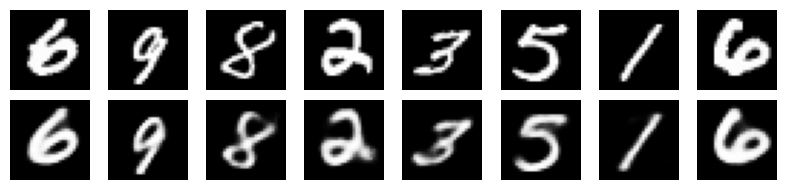

Test loss: 6598.4732
Epoch: 1
Train loss: 6648.001953125 6336/60000
Train loss: 6646.34765625 12736/60000
Train loss: 6696.0986328125 19136/60000
Train loss: 6915.900390625 25536/60000
Train loss: 6236.3798828125 31936/60000
Train loss: 6840.76171875 38336/60000
Train loss: 6734.17041015625 44736/60000
Train loss: 6690.80078125 51136/60000
Train loss: 6791.369140625 57536/60000
Average loss: 6596.161934468284


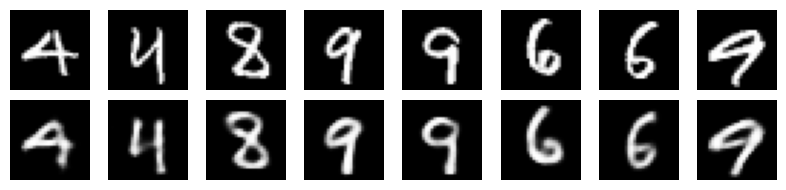

Test loss: 6577.2562
Epoch: 2
Train loss: 6487.21923828125 6336/60000
Train loss: 6199.50439453125 12736/60000
Train loss: 6860.97607421875 19136/60000
Train loss: 6549.28857421875 25536/60000
Train loss: 6492.423828125 31936/60000
Train loss: 6591.4619140625 38336/60000
Train loss: 6640.1484375 44736/60000
Train loss: 6689.11474609375 51136/60000
Train loss: 6542.8583984375 57536/60000
Average loss: 6593.3130538712685


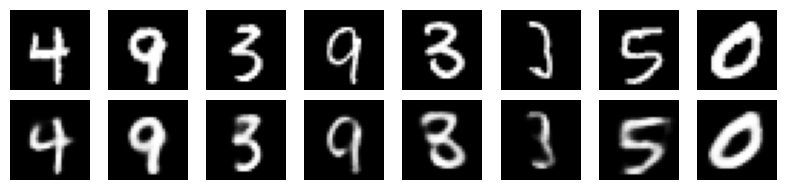

Test loss: 6553.6781
Epoch: 3
Train loss: 6638.09521484375 6336/60000
Train loss: 6590.23779296875 12736/60000
Train loss: 6391.126953125 19136/60000
Train loss: 6505.251953125 25536/60000
Train loss: 6477.40283203125 31936/60000
Train loss: 6759.2158203125 38336/60000
Train loss: 6471.70166015625 44736/60000
Train loss: 6682.2041015625 51136/60000
Train loss: 6546.31982421875 57536/60000
Average loss: 6586.067589473114


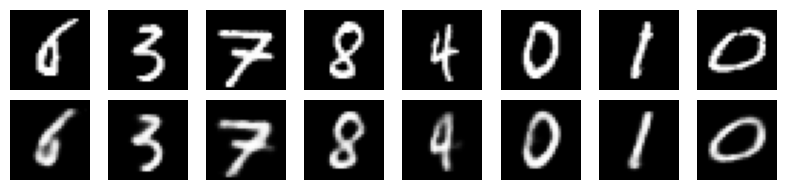

Test loss: 6557.4035
Epoch: 4
Train loss: 7015.16943359375 6336/60000
Train loss: 6578.57470703125 12736/60000
Train loss: 6737.76171875 19136/60000
Train loss: 6550.185546875 25536/60000
Train loss: 6552.517578125 31936/60000
Train loss: 6628.8505859375 38336/60000
Train loss: 6613.1787109375 44736/60000
Train loss: 6766.919921875 51136/60000
Train loss: 6710.7421875 57536/60000
Average loss: 6579.745289491438


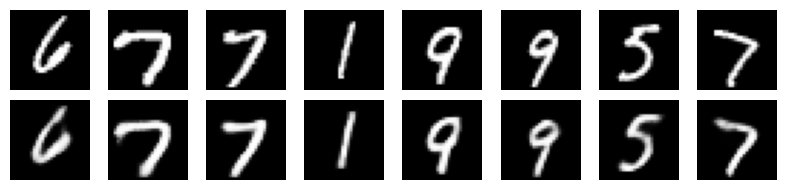

Test loss: 6553.0485
Epoch: 5
Train loss: 6503.01953125 6336/60000
Train loss: 6405.1943359375 12736/60000
Train loss: 6468.3310546875 19136/60000
Train loss: 6789.5654296875 25536/60000
Train loss: 6135.0517578125 31936/60000
Train loss: 6665.779296875 38336/60000
Train loss: 6635.662109375 44736/60000
Train loss: 6439.72607421875 51136/60000
Train loss: 6830.9306640625 57536/60000
Average loss: 6575.5801270572365


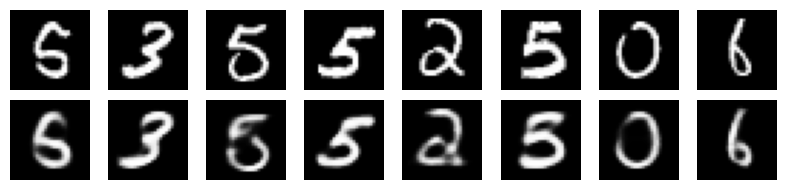

Test loss: 6550.7803
Epoch: 6
Train loss: 6721.5322265625 6336/60000
Train loss: 6306.5224609375 12736/60000
Train loss: 6245.4697265625 19136/60000
Train loss: 6376.39599609375 25536/60000
Train loss: 6687.4345703125 31936/60000
Train loss: 6509.4912109375 38336/60000
Train loss: 6882.45556640625 44736/60000
Train loss: 6511.54345703125 51136/60000
Train loss: 6369.10302734375 57536/60000
Average loss: 6568.620153626399


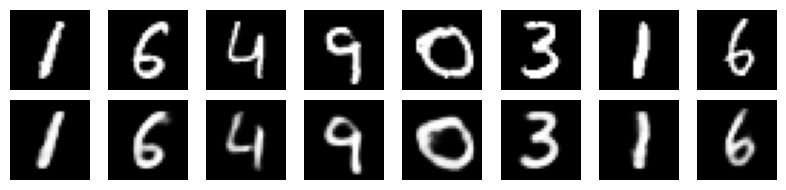

Test loss: 6551.7531
Epoch: 7
Train loss: 6356.50390625 6336/60000
Train loss: 6470.5244140625 12736/60000
Train loss: 6212.681640625 19136/60000
Train loss: 6491.69140625 25536/60000
Train loss: 6404.88525390625 31936/60000
Train loss: 6790.6259765625 38336/60000
Train loss: 6493.6513671875 44736/60000
Train loss: 6519.60546875 51136/60000
Train loss: 6360.31201171875 57536/60000
Average loss: 6563.785210908349


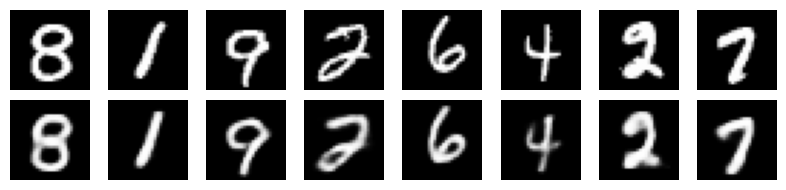

Test loss: 6548.4328
Epoch: 8
Train loss: 6256.7041015625 6336/60000
Train loss: 6770.59375 12736/60000
Train loss: 6673.80126953125 19136/60000
Train loss: 6372.12255859375 25536/60000
Train loss: 7001.8544921875 31936/60000
Train loss: 6544.6748046875 38336/60000
Train loss: 6723.40087890625 44736/60000
Train loss: 6745.59130859375 51136/60000
Train loss: 7058.22216796875 57536/60000
Average loss: 6558.481102786847


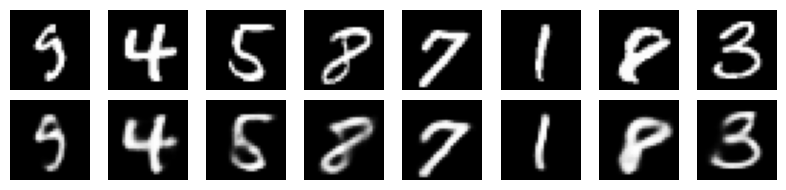

Test loss: 6542.8268
Epoch: 9
Train loss: 6665.4013671875 6336/60000
Train loss: 6660.8359375 12736/60000
Train loss: 6554.6083984375 19136/60000
Train loss: 6775.02734375 25536/60000
Train loss: 6603.6357421875 31936/60000
Train loss: 6624.3818359375 38336/60000
Train loss: 6405.93701171875 44736/60000
Train loss: 6627.58349609375 51136/60000
Train loss: 6626.02734375 57536/60000
Average loss: 6556.897377128032


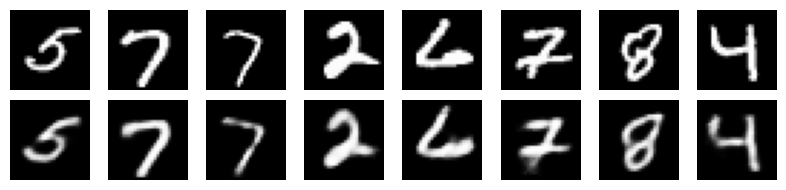

Test loss: 6537.5841
Done


In [30]:
epochs = 10
for t in range(epochs):
  print(f"Epoch: {t}\n =====================")
  train(train_loader, model, loss_function, optimizer)
  test(test_loader, model, loss_function,t)

print("Done")

‰Ω†ÈóÆÁöÑËøôÊÆµ‰ª£Á†ÅÊòØ VAE ËÆ≠ÁªÉÊµÅÁ®ã‰∏≠**Áî®‰∫é‚ÄúÈáçÂª∫ÂõæÂÉèÂèØËßÜÂåñ‚ÄùÁöÑÈÉ®ÂàÜ**ÔºåÂÆÉÁöÑ‰ΩúÁî®ÊòØÔºö**Âú®ÊØè‰∏™ epoch ÁöÑÊµãËØïÈò∂ÊÆµÔºåÊääÂéüÂõæÂÉèÂíåÈáçÂª∫ÂõæÂÉèÊãºÂú®‰∏ÄËµ∑‰øùÂ≠òÊàê‰∏ÄÂº†Âõæ**ÔºåÊñπ‰æøËßÇÂØüÊ®°ÂûãÁöÑÈáçÂª∫ËÉΩÂäõ„ÄÇ

---

## üîç ÈÄêË°åËß£ÈáäËøôÊÆµ‰ª£Á†ÅÔºö

```python
if i == 0:
```

* Âè™Â§ÑÁêÜÊµãËØïÈõÜÁöÑÁ¨¨‰∏Ä‰∏™ batchÔºàÈÅøÂÖçÊØèÊ¨°ÈÉΩ‰øùÂ≠òÂ§™Â§öÂõæÔºâ

---

```python
n = min(data.size(0), 8)
```

* `data.size(0)` ÊòØÂΩìÂâç batch ÁöÑÂ§ßÂ∞èÔºàÈÄöÂ∏∏ÊòØ batch\_sizeÔºâ
* Âè™ÂèñÂâç `n` Âº†ÂõæÂÉèÔºåÊúÄÂ§öÂèñ 8 Âº†ÔºåÈÅøÂÖçÂõæÂÉèÂ§™Â§ß‰∏çÂ•ΩÁúã

---

```python
comparison = torch.cat([
    data[:n],
    recon_batch.view(args.batch_size, 1, 28, 28)[:n]
])
```

### ‚úÖ Ëøô‰∏ÄË°åÂÅö‰∫Ü‰ªÄ‰πàÔºü

* `data[:n]`ÔºöÂéüÂßãËæìÂÖ•ÂõæÂÉèÔºàÂâç `n` Âº†Ôºâ
* `recon_batch.view(...)[:n]`ÔºöÂØπÂ∫îÁöÑÈáçÂª∫ÂõæÂÉèÔºàreshape ÊàêÂõæÂÉèÊ†ºÂºèÔºâ
* `torch.cat([...])`ÔºöÊääÂéüÂõæÂíåÈáçÂª∫Âõæ**‰∏ä‰∏ãÊãºÊé•Êàê‰∏ÄÁªÑ**ÔºåÂèòÊàê 2n Âº†Âõæ

---

```python
save_image(comparison.cpu(), 'results/reconstruction_{}.png'.format(epoch), nrow=n)
```

* ÊääÊãºÊé•Â•ΩÁöÑÂõæÂÉè‰øùÂ≠ò‰∏∫ `.png` Êñá‰ª∂
* Êñá‰ª∂ÂêçÂåÖÂê´ÂΩìÂâç `epoch`ÔºåÊØîÂ¶Ç `reconstruction_10.png`
* `nrow=n` Ë°®Á§∫ÊØèË°åÊîæ `n` Âº†ÂõæÔºåÂõ†Ê≠§‰Ω†‰ºöÁúãÂà∞‰∏§Ë°åÔºö

  * Á¨¨‰∏ÄË°åÊòØÂéüÂõæ
  * Á¨¨‰∫åË°åÊòØÈáçÂª∫Âõæ

---

## üì∑ ÂõæÂÉè‰øùÂ≠òÁªìÊûúÁöÑÊ†∑Â≠êÔºàÁ§∫ÊÑèÔºâÔºö

```
+----------+----------+----------+----------+
|   ÂéüÂõæ1  |  ÂéüÂõæ2   |  ÂéüÂõæ3   |  ...     |
+----------+----------+----------+----------+
|ÈáçÂª∫Âõæ1  |  ÈáçÂª∫Âõæ2 | ÈáçÂª∫Âõæ3 |  ...     |
+----------+----------+----------+----------+
```

---

## ‚úÖ ÊÄªÁªìÔºöËøôÊÆµ‰ª£Á†ÅÁöÑ‰ΩúÁî®

| ÁõÆÁöÑ                 | ËØ¥Êòé                  |
| ------------------ | ------------------- |
| ‰øùÂ≠òÂéüÂõæ‰∏éÈáçÂª∫ÂõæÁöÑÂØπÊØî        | Áõ¥ËßÇËØÑ‰º∞Ê®°ÂûãÁîüÊàêËÉΩÂäõ„ÄÅÁúãÊòØÂê¶‚ÄúÂÉèÂéüÂõæ‚Äù |
| ÊØè‰∏™ epoch ‰øùÂ≠ò‰∏ÄÊ¨°      | Áî®‰∫éËßÇÂØüËÆ≠ÁªÉËøáÁ®ãÊòØÂê¶Á®≥ÂÆö„ÄÅÊòØÂê¶ÊåÅÁª≠ÊèêÂçá |
| Âè™‰øùÂ≠òÁ¨¨‰∏Ä‰∏™ batch ÁöÑÂâçÂá†Âº†Âõæ | ÂáèÂ∞ëËæìÂá∫ÈáèÔºåÊñπ‰æøÊü•ÁúãÂíåÂØπÊØî       |

---

## üß† Â∞èÂª∫ËÆÆ

* Â¶ÇÊûú‰Ω†ÊÉ≥Êõ¥Áõ¥ËßÇËØÑ‰º∞ÊïàÊûúÔºå‰πüÂèØ‰ª•‰øùÂ≠ò `.gif` Âä®ÂõæÊàñËÄÖÂØπÊØîÂ§ö‰∏™ epoch ÁöÑÂõæÁâáÔºõ
* `save_image()` ÊòØ `torchvision.utils` Êèê‰æõÁöÑÂõæÂÉè‰øùÂ≠òÂ∑•ÂÖ∑ÔºåÂÜÖÈÉ®‰ºöÊää `[0,1]` ÁöÑÂº†ÈáèËΩ¨ÊàêÂõæÂÉèÊ†ºÂºèÔºõ

---

ÊòØÂê¶ÈúÄË¶ÅÊàëÂ∏Æ‰Ω†ÂÜô‰∏Ä‰∏™È¢ùÂ§ñÁöÑËÑöÊú¨Êù•Ëá™Âä®ÊãºÊé•Â§ö‰∏™ epoch ÁöÑ `reconstruction_*.png` Êàê‰∏ÄÂº†Ê®™ÂêëËøõÂ∫¶ÂõæÔºüËøôÊ†∑‰Ω†ÂèØ‰ª•‰∏ÄÁúºÁúãÂá∫Ê®°ÂûãÂú®Á¨¨ 1„ÄÅ10„ÄÅ20„ÄÅ50 epoch ÁöÑËøõÊ≠•„ÄÇ
